In [42]:
import sys
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import urllib
from threading import Thread
from queue import Queue
import math
import requests
import time 
from datetime import timedelta
import pickle
from datetime import datetime



In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

In [59]:
df = pd.read_csv('correct3.csv', index_col=0, encoding="utf-8", delimiter=",")
df.head()

,sizeOriginal,sizeDaff,evolution,patch,quality,numberOfVersions,originalRows,originalColumns,addedRows,deletedRows,modifiedRows,addedColumns,deletedColumns,modifiedColumns,totalChanged,changedCells,sizeZip,sizeZipDaff
folder,,,,,,,,,,,,,,,,,,
31,6936693,126897,3896,10388,3840,92,1320,2,0.005097,0.000008,0.000634,0.000000,0.000000,0,1317,0.005422,2098371,46951
74,166816,165803,152,109,106,66,18,12,0.005892,0.001684,1.194444,0.002525,0.002525,0,1631085,114.413931,87220,83024
98,14609270,921000,20471,237332,10327,56,1858,18,0.000951,0.000048,0.023643,0.001984,0.000000,0,14642613,7.818300,4071195,202603
516,5524334,589086,2023,10137,1452,42,157,22,0.009099,0.001365,0.000000,0.000000,0.000000,0,1494,0.010299,1367095,114507
519,3235981,286304,1292,6907,811,44,64,13,0.154830,0.008168,0.067827,0.000000,0.000000,0,6214,0.169744,335408,51337


In [60]:
del df['modifiedColumns']
del df['totalChanged']

In [61]:
df.describe()

,sizeOriginal,sizeDaff,evolution,patch,quality,numberOfVersions,originalRows,originalColumns,addedRows,deletedRows,modifiedRows,addedColumns,deletedColumns,changedCells,sizeZip,sizeZipDaff
count,7.260000e+02,7.260000e+02,7.260000e+02,7.260000e+02,726.000000,726.000000,726.000000,726.000000,726.000000,726.000000,726.000000,726.000000,726.000000,726.000000,7.260000e+02,7.260000e+02
mean,7.080259e+05,2.922477e+05,6.247583e+03,8.964331e+03,1190.757576,17.826446,431.234160,5.404959,1.852942,0.792824,0.088197,0.225498,0.224304,1663.955061,1.565561e+05,5.976531e+04
std,1.904106e+06,9.737492e+05,9.996206e+04,6.105751e+04,7186.780706,6.179848,1596.233829,8.479829,21.371108,2.021257,0.802850,0.286035,0.286892,29564.600995,3.692180e+05,1.610692e+05
min,4.940000e+02,1.069000e+03,6.000000e+00,5.000000e+00,4.000000,8.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000545,2.090000e+03,2.281000e+03
25%,7.775675e+04,6.323375e+04,3.117500e+02,6.325000e+01,167.250000,14.000000,24.000000,1.000000,0.028640,0.008388,0.000000,0.009259,0.000000,3.746759,3.043125e+04,1.884650e+04
50%,1.864425e+05,1.110580e+05,6.730000e+02,1.320000e+02,324.000000,18.000000,74.000000,1.000000,0.220709,0.209025,0.000000,0.229021,0.229021,100.296340,6.191750e+04,3.295800e+04
75%,3.836960e+05,2.265822e+05,1.106000e+03,3.197500e+02,535.750000,21.000000,455.000000,6.000000,0.771335,0.523821,0.003696,0.362727,0.362727,361.371122,1.139192e+05,5.782425e+04
max,1.889952e+07,1.423151e+07,2.676666e+06,1.005401e+06,123843.000000,92.000000,29225.000000,51.000000,572.250000,31.408696,19.774510,6.187500,6.187500,795793.332900,4.071195e+06,2.881219e+06


In [62]:
df = df.rename(columns={'evolution': 'comparisonTime', 'patch': 'patchingTime', 'quality':'validationTime'})


In [63]:
df.head()

,sizeOriginal,sizeDaff,comparisonTime,patchingTime,validationTime,numberOfVersions,originalRows,originalColumns,addedRows,deletedRows,modifiedRows,addedColumns,deletedColumns,changedCells,sizeZip,sizeZipDaff
folder,,,,,,,,,,,,,,,,
31,6936693,126897,3896,10388,3840,92,1320,2,0.005097,0.000008,0.000634,0.000000,0.000000,0.005422,2098371,46951
74,166816,165803,152,109,106,66,18,12,0.005892,0.001684,1.194444,0.002525,0.002525,114.413931,87220,83024
98,14609270,921000,20471,237332,10327,56,1858,18,0.000951,0.000048,0.023643,0.001984,0.000000,7.818300,4071195,202603
516,5524334,589086,2023,10137,1452,42,157,22,0.009099,0.001365,0.000000,0.000000,0.000000,0.010299,1367095,114507
519,3235981,286304,1292,6907,811,44,64,13,0.154830,0.008168,0.067827,0.000000,0.000000,0.169744,335408,51337


In [64]:
df['difference'] = df['sizeDaff'] / df['sizeOriginal']

In [65]:
df.head()

,sizeOriginal,sizeDaff,comparisonTime,patchingTime,validationTime,numberOfVersions,originalRows,originalColumns,addedRows,deletedRows,modifiedRows,addedColumns,deletedColumns,changedCells,sizeZip,sizeZipDaff,difference
folder,,,,,,,,,,,,,,,,,
31,6936693,126897,3896,10388,3840,92,1320,2,0.005097,0.000008,0.000634,0.000000,0.000000,0.005422,2098371,46951,0.018294
74,166816,165803,152,109,106,66,18,12,0.005892,0.001684,1.194444,0.002525,0.002525,114.413931,87220,83024,0.993927
98,14609270,921000,20471,237332,10327,56,1858,18,0.000951,0.000048,0.023643,0.001984,0.000000,7.818300,4071195,202603,0.063042
516,5524334,589086,2023,10137,1452,42,157,22,0.009099,0.001365,0.000000,0.000000,0.000000,0.010299,1367095,114507,0.106635
519,3235981,286304,1292,6907,811,44,64,13,0.154830,0.008168,0.067827,0.000000,0.000000,0.169744,335408,51337,0.088475


In [66]:
df.corr()

,sizeOriginal,sizeDaff,comparisonTime,patchingTime,validationTime,numberOfVersions,originalRows,originalColumns,addedRows,deletedRows,modifiedRows,addedColumns,deletedColumns,changedCells,sizeZip,sizeZipDaff,difference
sizeOriginal,1.000000,0.601895,0.309867,0.736764,0.606746,0.211082,0.575585,0.307978,0.185819,-0.041976,0.064123,-0.192488,-0.191876,0.023991,0.899944,0.487254,-0.269354
sizeDaff,0.601895,1.000000,0.614369,0.601267,0.461191,0.057345,0.513321,0.147851,0.015700,0.030003,0.193062,-0.070666,-0.070263,0.135460,0.481385,0.926751,0.078962
comparisonTime,0.309867,0.614369,1.000000,0.673600,0.650051,0.002491,0.715613,0.014711,0.014075,-0.003592,0.012559,-0.039880,-0.039582,0.008486,0.222751,0.436922,0.029396
patchingTime,0.736764,0.601267,0.673600,1.000000,0.899186,0.041196,0.858356,0.150050,0.033975,-0.044472,0.018690,-0.111472,-0.111033,-0.000194,0.651445,0.441828,-0.111010
validationTime,0.606746,0.461191,0.650051,0.899186,1.000000,0.028414,0.897107,0.019302,0.192013,0.010118,-0.000430,-0.074580,-0.073900,0.000277,0.470952,0.306713,-0.086417
numberOfVersions,0.211082,0.057345,0.002491,0.041196,0.028414,1.000000,-0.026719,-0.145132,0.011350,0.012585,-0.012150,0.089511,0.092116,-0.002025,0.276971,0.098678,0.106132
originalRows,0.575585,0.513321,0.715613,0.858356,0.897107,-0.026719,1.000000,0.043883,-0.021198,-0.084322,-0.011815,-0.103819,-0.103085,-0.012473,0.482827,0.335028,-0.133822
originalColumns,0.307978,0.147851,0.014711,0.150050,0.019302,-0.145132,0.043883,1.000000,-0.043428,-0.198751,0.094559,-0.371227,-0.375661,-0.010943,0.266772,0.103594,-0.466477
addedRows,0.185819,0.015700,0.014075,0.033975,0.192013,0.011350,-0.021198,-0.043428,1.000000,0.162704,0.001675,-0.011880,-0.011504,0.008005,0.045651,-0.000740,-0.045134
deletedRows,-0.041976,0.030003,-0.003592,-0.044472,0.010118,0.012585,-0.084322,-0.198751,0.162704,1.000000,-0.011578,0.172549,0.173568,0.062149,-0.062575,0.029339,0.135436


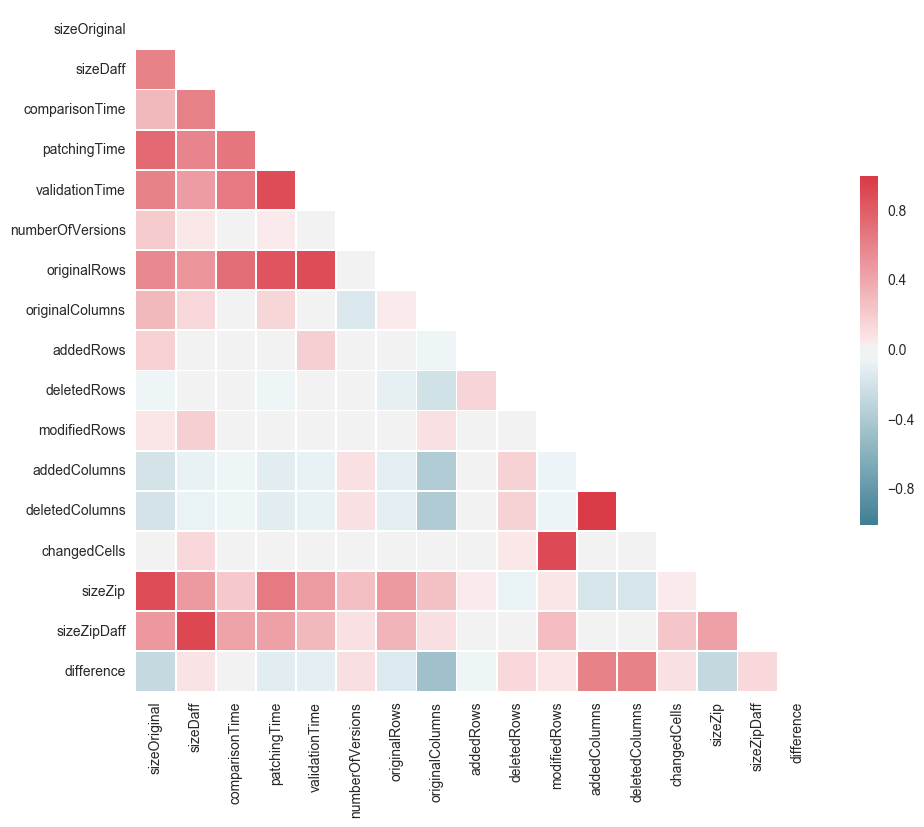

In [67]:
sns.set(style="white")
corr = df.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1,
            square=True,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)
sns.plt.show()

In [68]:
dfTest = df.ix[:,6:15]

In [69]:
dfTest.describe()

,originalRows,originalColumns,addedRows,deletedRows,modifiedRows,addedColumns,deletedColumns,changedCells,sizeZip
count,726.000000,726.000000,726.000000,726.000000,726.000000,726.000000,726.000000,726.000000,7.260000e+02
mean,431.234160,5.404959,1.852942,0.792824,0.088197,0.225498,0.224304,1663.955061,1.565561e+05
std,1596.233829,8.479829,21.371108,2.021257,0.802850,0.286035,0.286892,29564.600995,3.692180e+05
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000545,2.090000e+03
25%,24.000000,1.000000,0.028640,0.008388,0.000000,0.009259,0.000000,3.746759,3.043125e+04
50%,74.000000,1.000000,0.220709,0.209025,0.000000,0.229021,0.229021,100.296340,6.191750e+04
75%,455.000000,6.000000,0.771335,0.523821,0.003696,0.362727,0.362727,361.371122,1.139192e+05
max,29225.000000,51.000000,572.250000,31.408696,19.774510,6.187500,6.187500,795793.332900,4.071195e+06


In [70]:
dfTest2 = dfTest

In [71]:
dfTest2.head()

,originalRows,originalColumns,addedRows,deletedRows,modifiedRows,addedColumns,deletedColumns,changedCells,sizeZip
folder,,,,,,,,,
31,1320,2,0.005097,0.000008,0.000634,0.000000,0.000000,0.005422,2098371
74,18,12,0.005892,0.001684,1.194444,0.002525,0.002525,114.413931,87220
98,1858,18,0.000951,0.000048,0.023643,0.001984,0.000000,7.818300,4071195
516,157,22,0.009099,0.001365,0.000000,0.000000,0.000000,0.010299,1367095
519,64,13,0.154830,0.008168,0.067827,0.000000,0.000000,0.169744,335408


In [72]:
dfTest2['schema'] = "same"

In [73]:
df['schema'] = "different"

In [74]:
df.loc[df.deletedColumns + df.addedColumns == 0,  'schema'] = 'same'


In [75]:
df.head()

,sizeOriginal,sizeDaff,comparisonTime,patchingTime,validationTime,numberOfVersions,originalRows,originalColumns,addedRows,deletedRows,modifiedRows,addedColumns,deletedColumns,changedCells,sizeZip,sizeZipDaff,difference,schema
folder,,,,,,,,,,,,,,,,,,
31,6936693,126897,3896,10388,3840,92,1320,2,0.005097,0.000008,0.000634,0.000000,0.000000,0.005422,2098371,46951,0.018294,same
74,166816,165803,152,109,106,66,18,12,0.005892,0.001684,1.194444,0.002525,0.002525,114.413931,87220,83024,0.993927,different
98,14609270,921000,20471,237332,10327,56,1858,18,0.000951,0.000048,0.023643,0.001984,0.000000,7.818300,4071195,202603,0.063042,different
516,5524334,589086,2023,10137,1452,42,157,22,0.009099,0.001365,0.000000,0.000000,0.000000,0.010299,1367095,114507,0.106635,same
519,3235981,286304,1292,6907,811,44,64,13,0.154830,0.008168,0.067827,0.000000,0.000000,0.169744,335408,51337,0.088475,same


In [76]:
dfTest2.head()

,originalRows,originalColumns,addedRows,deletedRows,modifiedRows,addedColumns,deletedColumns,changedCells,sizeZip,schema
folder,,,,,,,,,,
31,1320,2,0.005097,0.000008,0.000634,0.000000,0.000000,0.005422,2098371,same
74,18,12,0.005892,0.001684,1.194444,0.002525,0.002525,114.413931,87220,same
98,1858,18,0.000951,0.000048,0.023643,0.001984,0.000000,7.818300,4071195,same
516,157,22,0.009099,0.001365,0.000000,0.000000,0.000000,0.010299,1367095,same
519,64,13,0.154830,0.008168,0.067827,0.000000,0.000000,0.169744,335408,same


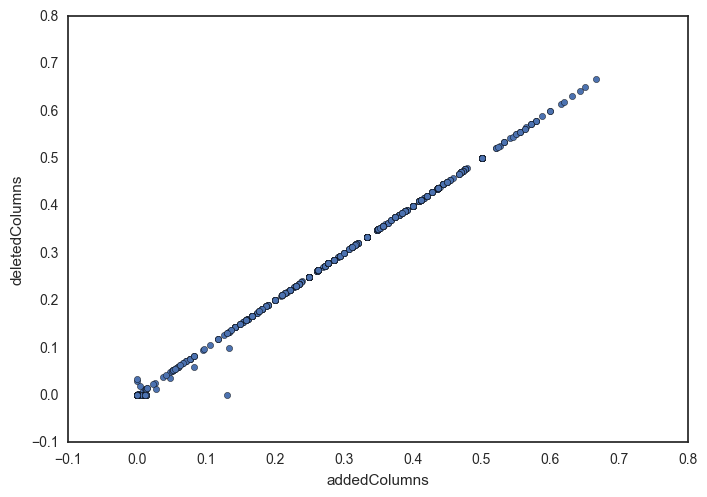

In [77]:
df[df['deletedColumns'] < 6].plot(kind='scatter', x='addedColumns', y='deletedColumns');
sns.plt.show()

In [78]:
dfTest2 = df[[6,7,10,11,12,13,14,15]]

In [79]:
dfTest2.head()

,originalRows,originalColumns,modifiedRows,addedColumns,deletedColumns,changedCells,sizeZip,sizeZipDaff
folder,,,,,,,,
31,1320,2,0.000634,0.000000,0.000000,0.005422,2098371,46951
74,18,12,1.194444,0.002525,0.002525,114.413931,87220,83024
98,1858,18,0.023643,0.001984,0.000000,7.818300,4071195,202603
516,157,22,0.000000,0.000000,0.000000,0.010299,1367095,114507
519,64,13,0.067827,0.000000,0.000000,0.169744,335408,51337


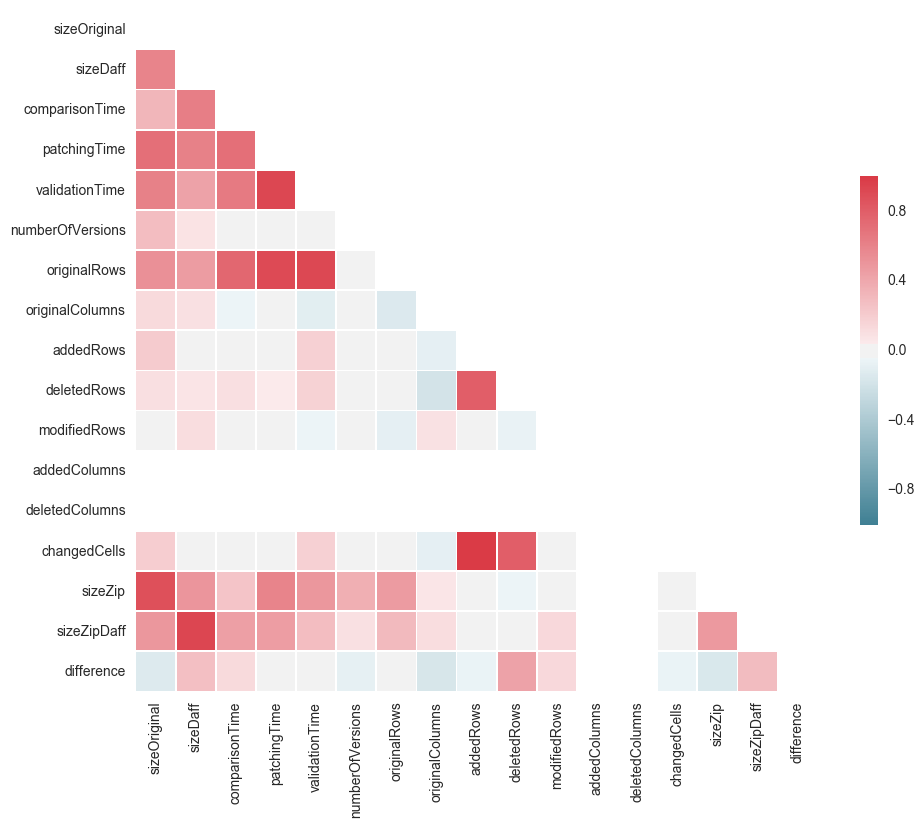

In [80]:
dfSameSchema = df.loc[df['addedColumns'] == 0].loc[df['deletedColumns'] == 0]
sns.set(style="white")
corr = dfSameSchema.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1,
            square=True,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

sns.plt.show()


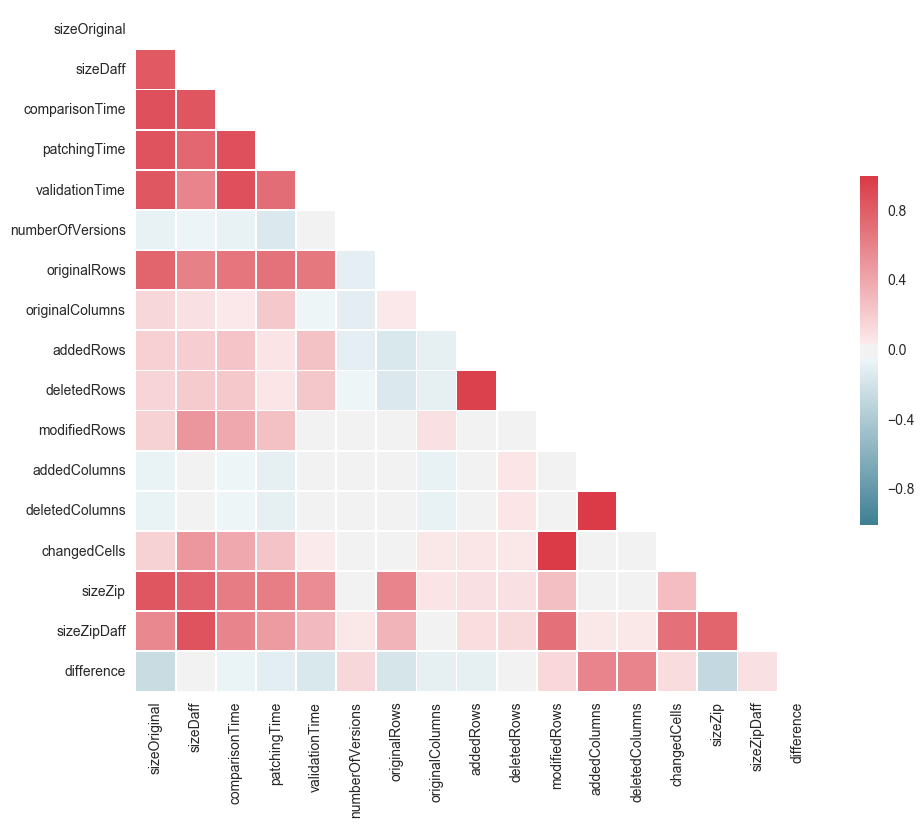

In [81]:
dfChangeSchema = df.loc[df['addedColumns'] != 0].loc[df['deletedColumns'] != 0]
sns.set(style="white")
corr = dfChangeSchema.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1,
            square=True,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)
sns.plt.show()

In [82]:
df.head()

,sizeOriginal,sizeDaff,comparisonTime,patchingTime,validationTime,numberOfVersions,originalRows,originalColumns,addedRows,deletedRows,modifiedRows,addedColumns,deletedColumns,changedCells,sizeZip,sizeZipDaff,difference,schema
folder,,,,,,,,,,,,,,,,,,
31,6936693,126897,3896,10388,3840,92,1320,2,0.005097,0.000008,0.000634,0.000000,0.000000,0.005422,2098371,46951,0.018294,same
74,166816,165803,152,109,106,66,18,12,0.005892,0.001684,1.194444,0.002525,0.002525,114.413931,87220,83024,0.993927,different
98,14609270,921000,20471,237332,10327,56,1858,18,0.000951,0.000048,0.023643,0.001984,0.000000,7.818300,4071195,202603,0.063042,different
516,5524334,589086,2023,10137,1452,42,157,22,0.009099,0.001365,0.000000,0.000000,0.000000,0.010299,1367095,114507,0.106635,same
519,3235981,286304,1292,6907,811,44,64,13,0.154830,0.008168,0.067827,0.000000,0.000000,0.169744,335408,51337,0.088475,same


In [83]:
import re
label = ""
for index, row in df.iterrows():
    if (row['addedColumns'] == 0 and row['deletedColumns'] == 0):
        label = "same"
    else:
        label = "different"
    df.set_value(index, 'schema', label) 
df.head()

,sizeOriginal,sizeDaff,comparisonTime,patchingTime,validationTime,numberOfVersions,originalRows,originalColumns,addedRows,deletedRows,modifiedRows,addedColumns,deletedColumns,changedCells,sizeZip,sizeZipDaff,difference,schema
folder,,,,,,,,,,,,,,,,,,
31,6936693,126897,3896,10388,3840,92,1320,2,0.005097,0.000008,0.000634,0.000000,0.000000,0.005422,2098371,46951,0.018294,same
74,166816,165803,152,109,106,66,18,12,0.005892,0.001684,1.194444,0.002525,0.002525,114.413931,87220,83024,0.993927,different
98,14609270,921000,20471,237332,10327,56,1858,18,0.000951,0.000048,0.023643,0.001984,0.000000,7.818300,4071195,202603,0.063042,different
516,5524334,589086,2023,10137,1452,42,157,22,0.009099,0.001365,0.000000,0.000000,0.000000,0.010299,1367095,114507,0.106635,same
519,3235981,286304,1292,6907,811,44,64,13,0.154830,0.008168,0.067827,0.000000,0.000000,0.169744,335408,51337,0.088475,same


In [84]:
df.head()

,sizeOriginal,sizeDaff,comparisonTime,patchingTime,validationTime,numberOfVersions,originalRows,originalColumns,addedRows,deletedRows,modifiedRows,addedColumns,deletedColumns,changedCells,sizeZip,sizeZipDaff,difference,schema
folder,,,,,,,,,,,,,,,,,,
31,6936693,126897,3896,10388,3840,92,1320,2,0.005097,0.000008,0.000634,0.000000,0.000000,0.005422,2098371,46951,0.018294,same
74,166816,165803,152,109,106,66,18,12,0.005892,0.001684,1.194444,0.002525,0.002525,114.413931,87220,83024,0.993927,different
98,14609270,921000,20471,237332,10327,56,1858,18,0.000951,0.000048,0.023643,0.001984,0.000000,7.818300,4071195,202603,0.063042,different
516,5524334,589086,2023,10137,1452,42,157,22,0.009099,0.001365,0.000000,0.000000,0.000000,0.010299,1367095,114507,0.106635,same
519,3235981,286304,1292,6907,811,44,64,13,0.154830,0.008168,0.067827,0.000000,0.000000,0.169744,335408,51337,0.088475,same


In [85]:
dfTest = df.copy()

In [86]:
dfTest['averageSize'] = dfTest['sizeOriginal'] / dfTest['numberOfVersions']
dfTest['averageDaff'] = dfTest['sizeDaff'] / dfTest['numberOfVersions']
dfTest['sizeDifference'] = (dfTest['sizeOriginal'] - dfTest['sizeDaff'])
dfTest['averageDifference'] = dfTest['sizeDifference'] / dfTest['numberOfVersions']
dfTest['averageRatio'] = dfTest['averageDaff'] / dfTest['averageSize']
dfTest['averageZip'] = dfTest['sizeZip'] / dfTest['numberOfVersions']
dfTest['averageZipRatio'] = dfTest['averageZip'] / dfTest['averageSize']
dfTest['zipRatio'] = dfTest['sizeZip'] / dfTest['sizeOriginal']
dfTest['daffZipRatio'] = dfTest['sizeZipDaff'] / dfTest['sizeZip']

In [87]:
dfTest.head()

,sizeOriginal,sizeDaff,comparisonTime,patchingTime,validationTime,numberOfVersions,originalRows,originalColumns,addedRows,deletedRows,...,schema,averageSize,averageDaff,sizeDifference,averageDifference,averageRatio,averageZip,averageZipRatio,zipRatio,daffZipRatio
folder,,,,,,,,,,,,,,,,,,,,,
31,6936693,126897,3896,10388,3840,92,1320,2,0.005097,0.000008,...,same,75398.836957,1379.315217,6809796,74019.521739,0.018294,22808.380435,0.302503,0.302503,0.022375
74,166816,165803,152,109,106,66,18,12,0.005892,0.001684,...,different,2527.515152,2512.166667,1013,15.348485,0.993927,1321.515152,0.522852,0.522852,0.951892
98,14609270,921000,20471,237332,10327,56,1858,18,0.000951,0.000048,...,different,260879.821429,16446.428571,13688270,244433.392857,0.063042,72699.910714,0.278672,0.278672,0.049765
516,5524334,589086,2023,10137,1452,42,157,22,0.009099,0.001365,...,same,131531.761905,14025.857143,4935248,117505.904762,0.106635,32549.880952,0.247468,0.247468,0.083759
519,3235981,286304,1292,6907,811,44,64,13,0.154830,0.008168,...,same,73545.022727,6506.909091,2949677,67038.113636,0.088475,7622.909091,0.103650,0.103650,0.153058


In [88]:
dfTest.describe()

,sizeOriginal,sizeDaff,comparisonTime,patchingTime,validationTime,numberOfVersions,originalRows,originalColumns,addedRows,deletedRows,...,difference,averageSize,averageDaff,sizeDifference,averageDifference,averageRatio,averageZip,averageZipRatio,zipRatio,daffZipRatio
count,7.260000e+02,7.260000e+02,7.260000e+02,7.260000e+02,726.000000,726.000000,726.000000,726.000000,726.000000,726.000000,...,726.000000,726.000000,726.000000,7.260000e+02,726.000000,726.000000,726.000000,726.000000,726.000000,726.000000
mean,7.080259e+05,2.922477e+05,6.247583e+03,8.964331e+03,1190.757576,17.826446,431.234160,5.404959,1.852942,0.792824,...,0.744244,39951.069432,16939.287271,4.157782e+05,23011.782161,0.744244,8662.864723,0.366742,0.366742,0.645844
std,1.904106e+06,9.737492e+05,9.996206e+04,6.105751e+04,7186.780706,6.179848,1596.233829,8.479829,21.371108,2.021257,...,0.458238,97569.200191,51290.988392,1.530305e+06,77595.228227,0.458238,17947.728214,0.324175,0.324175,0.373559
min,4.940000e+02,1.069000e+03,6.000000e+00,5.000000e+00,4.000000,8.000000,1.000000,1.000000,0.000000,0.000000,...,0.018294,19.000000,41.115385,-5.356349e+06,-243470.409091,0.018294,149.769231,0.064500,0.064500,0.006252
25%,7.775675e+04,6.323375e+04,3.117500e+02,6.325000e+01,167.250000,14.000000,24.000000,1.000000,0.028640,0.008388,...,0.329529,4189.005013,3653.739583,-3.773500e+03,-218.937500,0.329529,1683.208333,0.300549,0.300549,0.315009
50%,1.864425e+05,1.110580e+05,6.730000e+02,1.320000e+02,324.000000,18.000000,74.000000,1.000000,0.220709,0.209025,...,0.730028,11580.639706,6324.330357,3.597400e+04,2295.355263,0.730028,3728.730994,0.368818,0.368818,0.658677
75%,3.836960e+05,2.265822e+05,1.106000e+03,3.197500e+02,535.750000,21.000000,455.000000,6.000000,0.771335,0.523821,...,1.058944,23219.762363,12183.635870,1.603665e+05,10236.473077,1.058944,6618.519231,0.415763,0.415763,0.917004
max,1.889952e+07,1.423151e+07,2.676666e+06,1.005401e+06,123843.000000,92.000000,29225.000000,51.000000,572.250000,31.408696,...,3.684918,833930.047619,837147.470588,1.620323e+07,771582.238095,3.684918,179325.777778,7.882591,7.882591,1.997278


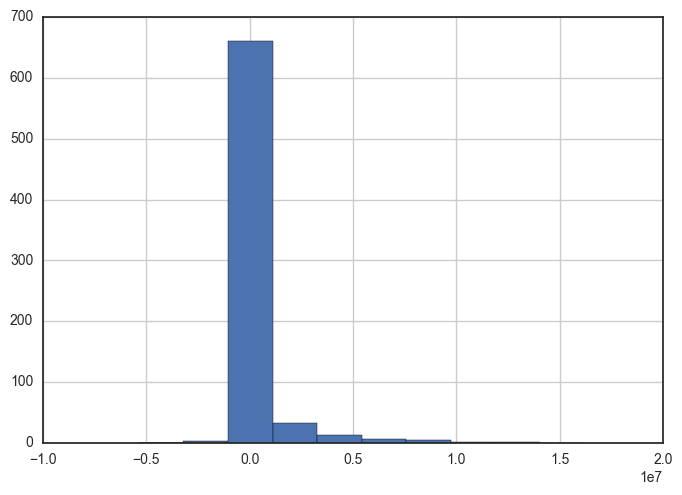

In [89]:
dfTest.sizeDifference.hist()
plt.show()

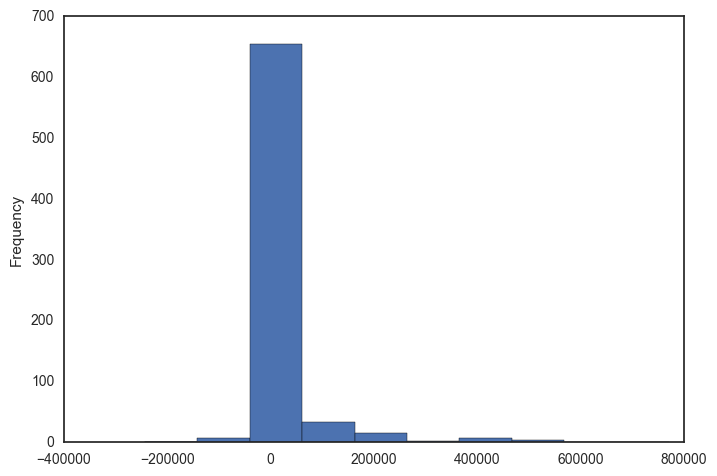

In [90]:
dfTest.averageDifference.plot.hist()
plt.show()

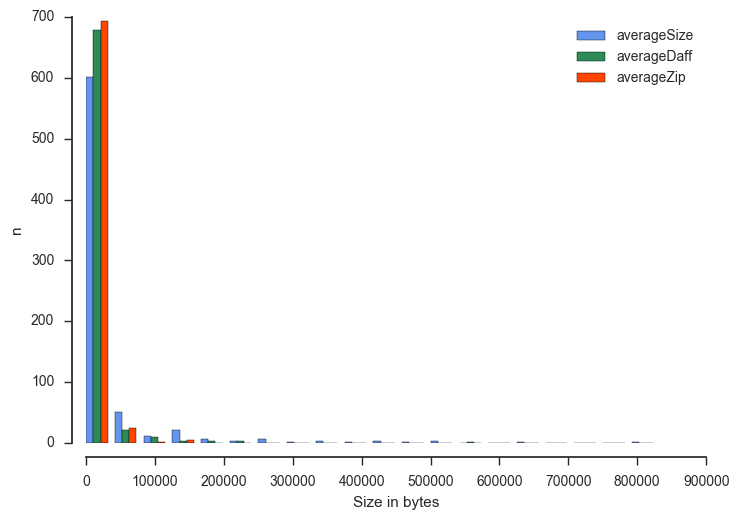

In [91]:
import seaborn
seaborn.set(style='ticks')

fig, ax = plt.subplots()

a_heights, a_bins = np.histogram(dfTest['averageSize'], bins=20)
b_heights, b_bins = np.histogram(dfTest['averageDaff'], bins=a_bins)
c_heights, c_bins = np.histogram(dfTest['averageZip'], bins=a_bins)

width = (a_bins[1] - a_bins[0])/4

ax.bar(a_bins[:-1], a_heights, width=width, facecolor='cornflowerblue', label="averageSize")
ax.bar(b_bins[:-1]+width, b_heights, width=width, facecolor='seagreen', label="averageDaff")
ax.bar(c_bins[:-1]+2*width, c_heights, width=width, facecolor='orangered', label="averageZip")

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)
seaborn.despine(ax=ax, offset=10)
sns.plt.xlabel('Size in bytes')
sns.plt.ylabel('n')
sns.plt.savefig("pictures/averageSizeDaff.pdf")
sns.plt.show()


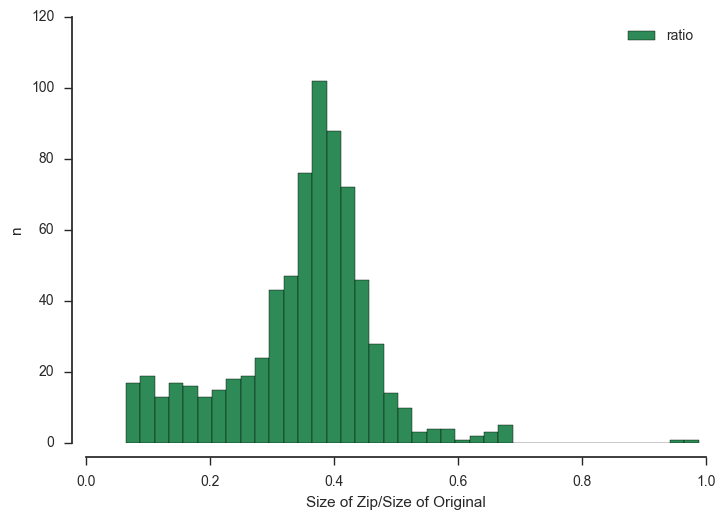

In [92]:
seaborn.set(style='ticks')

fig, ax = plt.subplots()

heights, bins = np.histogram(dfTest[dfTest['zipRatio'] <=1 ]['zipRatio'], bins=40)

width = (bins[1] - bins[0])

ax.bar(bins[:-1], heights, width=width, facecolor='seagreen', label="ratio")
handles, labels = ax.get_legend_handles_labels()

ax.legend(handles, labels)
seaborn.despine(ax=ax, offset=10)
sns.plt.xlabel('Size of Zip/Size of Original')
sns.plt.ylabel('n')
sns.plt.savefig("pictures/ratioDifferenceZip.pdf")
sns.plt.show()

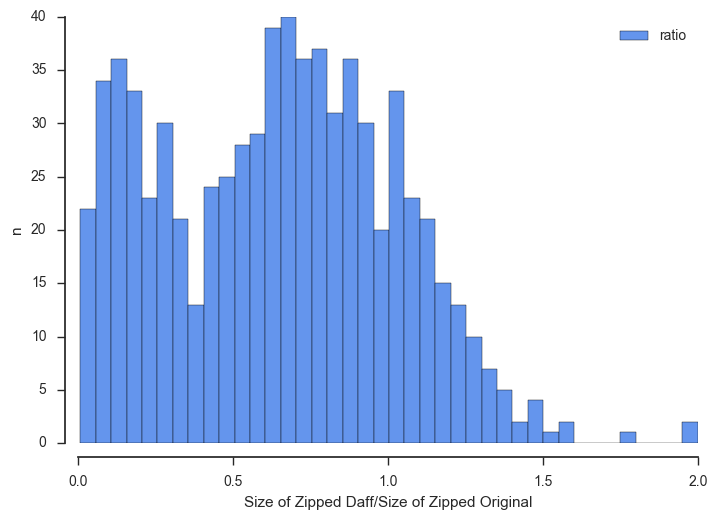

In [96]:
seaborn.set(style='ticks')

fig, ax = plt.subplots()

heights, bins = np.histogram(dfTest['daffZipRatio'], bins=40)

width = (bins[1] - bins[0])

ax.bar(bins[:-1], heights, width=width, facecolor='cornflowerblue', label="ratio")
handles, labels = ax.get_legend_handles_labels()

ax.legend(handles, labels)
seaborn.despine(ax=ax, offset=10)
sns.plt.xlabel('Size of Zipped Daff/Size of Zipped Original')
sns.plt.ylabel('n')
sns.plt.savefig("pictures/daffZipRatio.pdf")
sns.plt.show()

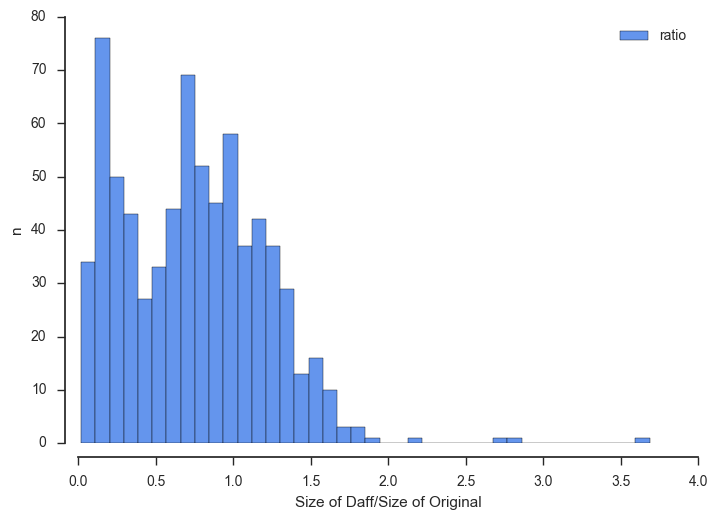

In [89]:
seaborn.set(style='ticks')

fig, ax = plt.subplots()

heights, bins = np.histogram(dfTest['averageRatio'], bins=40)

width = (bins[1] - bins[0])

ax.bar(bins[:-1], heights, width=width, facecolor='cornflowerblue', label="ratio")
handles, labels = ax.get_legend_handles_labels()

ax.legend(handles, labels)
seaborn.despine(ax=ax, offset=10)
sns.plt.xlabel('Size of Daff/Size of Original')
sns.plt.ylabel('n')
sns.plt.savefig("pictures/ratioDifference.pdf")
sns.plt.show()

In [90]:
dfTest['averageComparison'] = dfTest['comparisonTime'] / dfTest['numberOfVersions']
dfTest['averagePatching'] = dfTest['patchingTime'] / dfTest['numberOfVersions']
dfTest['averageValidation'] = dfTest['validationTime'] / dfTest['numberOfVersions']


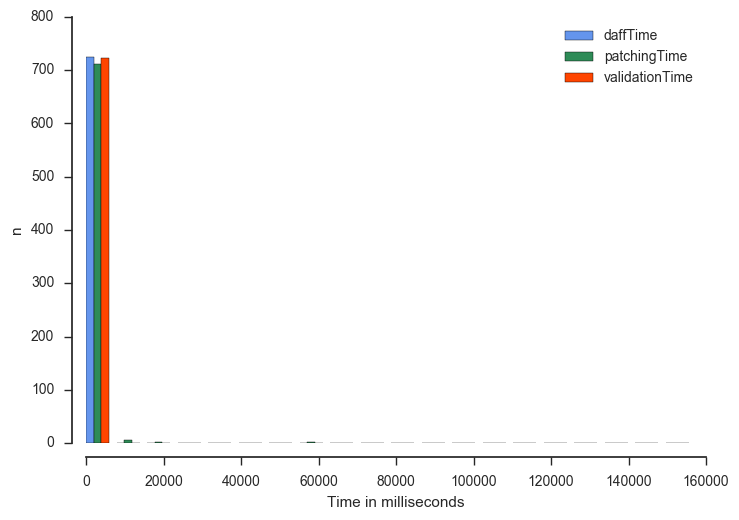

In [91]:
import seaborn
seaborn.set(style='ticks')

fig, ax = plt.subplots()

a_heights, a_bins = np.histogram(dfTest['averageComparison'], bins=20)
b_heights, b_bins = np.histogram(dfTest['averagePatching'], bins=a_bins)
c_heights, c_bins = np.histogram(dfTest['averageValidation'], bins=a_bins)

width = (a_bins[1] - a_bins[0])/4

ax.bar(a_bins[:-1], a_heights, width=width, facecolor='cornflowerblue', label="daffTime")
ax.bar(b_bins[:-1]+width, b_heights, width=width, facecolor='seagreen', label="patchingTime")
ax.bar(c_bins[:-1]+2*width, c_heights, width=width, facecolor='orangered', label="validationTime")

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)
seaborn.despine(ax=ax, offset=10)
sns.plt.xlabel('Time in milliseconds')
sns.plt.ylabel('n')
sns.plt.savefig("pictures/timeDistribution.pdf")
sns.plt.show()

In [92]:
dfTest.describe()

,sizeOriginal,sizeDaff,comparisonTime,patchingTime,validationTime,numberOfVersions,originalRows,originalColumns,addedRows,deletedRows,...,averageSize,averageDaff,sizeDifference,averageDifference,averageRatio,averageZip,averageZipRatio,averageComparison,averagePatching,averageValidation
count,7.260000e+02,7.260000e+02,7.260000e+02,7.260000e+02,726.000000,726.000000,726.000000,726.000000,726.000000,726.000000,...,726.000000,726.000000,7.260000e+02,726.000000,726.000000,726.000000,726.000000,726.000000,726.000000,726.000000
mean,7.080259e+05,2.922477e+05,6.247583e+03,8.964331e+03,1190.757576,17.826446,431.234160,5.404959,1.852942,0.792824,...,39951.069432,16939.287271,4.157782e+05,23011.782161,0.744244,8662.864723,0.366742,361.479476,530.344862,69.796603
std,1.904106e+06,9.737492e+05,9.996206e+04,6.105751e+04,7186.780706,6.179848,1596.233829,8.479829,21.371108,2.021257,...,97569.200191,51290.988392,1.530305e+06,77595.228227,0.458238,17947.728214,0.324175,5870.770890,3745.105092,432.485684
min,4.940000e+02,1.069000e+03,6.000000e+00,5.000000e+00,4.000000,8.000000,1.000000,1.000000,0.000000,0.000000,...,19.000000,41.115385,-5.356349e+06,-243470.409091,0.018294,149.769231,0.064500,0.500000,0.384615,0.409091
25%,7.775675e+04,6.323375e+04,3.117500e+02,6.325000e+01,167.250000,14.000000,24.000000,1.000000,0.028640,0.008388,...,4189.005013,3653.739583,-3.773500e+03,-218.937500,0.329529,1683.208333,0.300549,17.376488,3.892534,9.308333
50%,1.864425e+05,1.110580e+05,6.730000e+02,1.320000e+02,324.000000,18.000000,74.000000,1.000000,0.220709,0.209025,...,11580.639706,6324.330357,3.597400e+04,2295.355263,0.730028,3728.730994,0.368818,37.103679,7.302174,18.623737
75%,3.836960e+05,2.265822e+05,1.106000e+03,3.197500e+02,535.750000,21.000000,455.000000,6.000000,0.771335,0.523821,...,23219.762363,12183.635870,1.603665e+05,10236.473077,1.058944,6618.519231,0.415763,59.813939,21.000000,28.869444
max,1.889952e+07,1.423151e+07,2.676666e+06,1.005401e+06,123843.000000,92.000000,29225.000000,51.000000,572.250000,31.408696,...,833930.047619,837147.470588,1.620323e+07,771582.238095,3.684918,179325.777778,7.882591,157450.941176,59141.235294,6815.705882


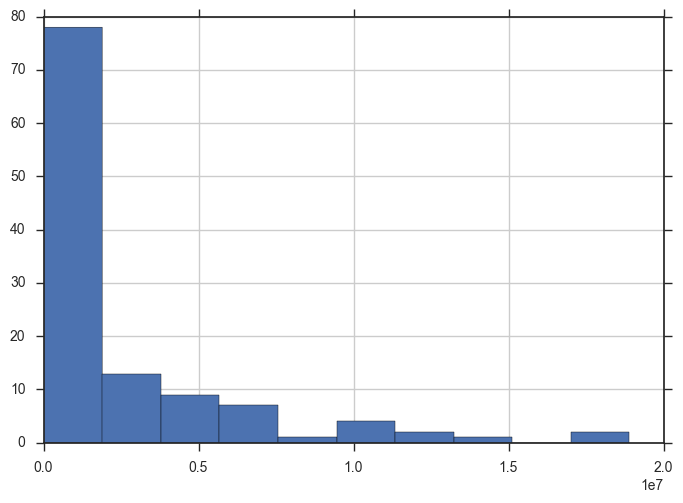

In [93]:
df[(df['addedColumns'] == 0) & (df['deletedColumns'] ==0)].sizeOriginal.hist()
plt.show()

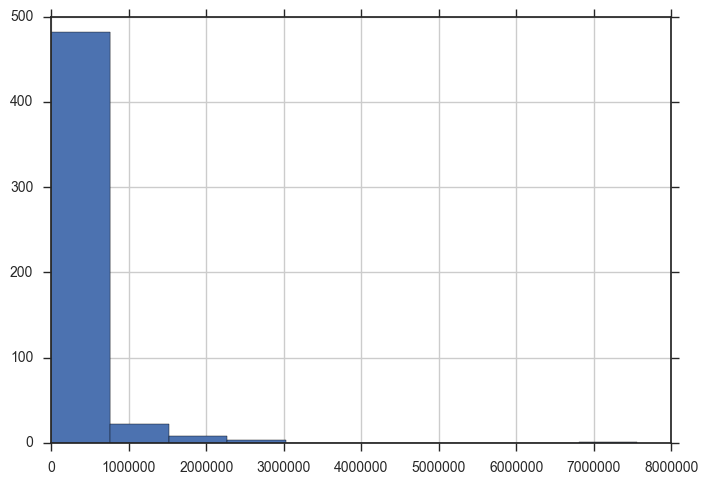

In [94]:
df[(df['addedColumns'] != 0) & (df['deletedColumns'] !=0)].sizeOriginal.hist(bins=10)
plt.show()

In [95]:
df[(df['addedColumns'] == 0) & (df['deletedColumns'] ==0) & (df['addedRows'] == 0) & (df['deletedRows'] ==0)]


,sizeOriginal,sizeDaff,comparisonTime,patchingTime,validationTime,numberOfVersions,originalRows,originalColumns,addedRows,deletedRows,modifiedRows,addedColumns,deletedColumns,changedCells,sizeZip,difference,schema
folder,,,,,,,,,,,,,,,,,
5171,514216,327327,355,526,140,18,214,10,0.0,0.0,0.944444,0.0,0.0,0.105607,191947,0.636555,same
5540,6309842,2920815,17596,93027,2539,17,732,44,0.0,0.0,0.941176,0.0,0.0,0.025839,1096746,0.462898,same
5680,380841,90369,125,370,88,15,69,32,0.0,0.0,0.333333,0.0,0.0,0.012107,97718,0.237288,same
5847,610788,443814,623,934,157,14,310,11,0.0,0.0,0.928571,0.0,0.0,0.090930,69731,0.726625,same
5933,3853,5616,12,9,7,16,4,4,0.0,0.0,0.875000,0.0,0.0,0.578125,4346,1.457566,same
6273,705771,708261,2952,1979,2271,12,9,4,0.0,0.0,0.916667,0.0,0.0,0.250000,197047,1.003528,same
6528,4354,6188,20,13,7,11,14,3,0.0,0.0,0.902597,0.0,0.0,0.461039,4604,1.421222,same
6618,563381,81136,177,914,126,11,280,14,0.0,0.0,0.090260,0.0,0.0,0.012894,165698,0.144016,same
6798,2658,4082,7,7,7,11,4,4,0.0,0.0,0.909091,0.0,0.0,0.602273,2977,1.535741,same


In [96]:
df[  (df['deletedColumns'] ==0)  & (df['deletedRows'] ==0)].describe()

,sizeOriginal,sizeDaff,comparisonTime,patchingTime,validationTime,numberOfVersions,originalRows,originalColumns,addedRows,deletedRows,modifiedRows,addedColumns,deletedColumns,changedCells,sizeZip,difference
count,8.100000e+01,8.100000e+01,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.0,81.000000,81.000000,81.0,81.000000,8.100000e+01,81.000000
mean,6.252711e+05,1.236520e+05,757.530864,2937.555556,465.876543,14.506173,361.024691,13.864198,0.127034,0.0,0.275615,0.006060,0.0,3.219438,1.592628e+05,0.293010
std,1.212944e+06,3.382019e+05,2380.409540,11227.547277,1466.072119,5.415541,886.117134,7.971438,0.975086,0.0,0.893576,0.014662,0.0,11.461677,2.664584e+05,0.284993
min,2.658000e+03,1.680000e+03,7.000000,7.000000,7.000000,9.000000,3.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000545,2.977000e+03,0.045004
25%,6.957900e+04,1.589400e+04,39.000000,44.000000,29.000000,11.000000,51.000000,6.000000,0.000978,0.0,0.010581,0.000000,0.0,0.021848,2.379300e+04,0.124443
50%,1.814990e+05,4.324700e+04,90.000000,248.000000,64.000000,13.000000,116.000000,18.000000,0.004843,0.0,0.099167,0.004630,0.0,1.514757,6.967700e+04,0.225767
75%,6.107880e+05,9.643000e+04,306.000000,895.000000,173.000000,17.000000,201.000000,18.000000,0.017921,0.0,0.159314,0.009259,0.0,3.247848,1.503460e+05,0.309848
max,6.309842e+06,2.920815e+06,17596.000000,93027.000000,10403.000000,42.000000,5185.000000,44.000000,8.785714,0.0,7.828571,0.129870,0.0,102.810967,1.320927e+06,1.535741


In [97]:
dfCorr = dfTest.copy()

In [98]:
dfCorr.head()

,sizeOriginal,sizeDaff,comparisonTime,patchingTime,validationTime,numberOfVersions,originalRows,originalColumns,addedRows,deletedRows,...,averageSize,averageDaff,sizeDifference,averageDifference,averageRatio,averageZip,averageZipRatio,averageComparison,averagePatching,averageValidation
folder,,,,,,,,,,,,,,,,,,,,,
31,6936693,126897,3896,10388,3840,92,1320,2,0.005097,0.000008,...,75398.836957,1379.315217,6809796,74019.521739,0.018294,22808.380435,0.302503,42.347826,112.913043,41.739130
74,166816,165803,152,109,106,66,18,12,0.005892,0.001684,...,2527.515152,2512.166667,1013,15.348485,0.993927,1321.515152,0.522852,2.303030,1.651515,1.606061
98,14609270,921000,20471,237332,10327,56,1858,18,0.000951,0.000048,...,260879.821429,16446.428571,13688270,244433.392857,0.063042,72699.910714,0.278672,365.553571,4238.071429,184.410714
516,5524334,589086,2023,10137,1452,42,157,22,0.009099,0.001365,...,131531.761905,14025.857143,4935248,117505.904762,0.106635,32549.880952,0.247468,48.166667,241.357143,34.571429
519,3235981,286304,1292,6907,811,44,64,13,0.154830,0.008168,...,73545.022727,6506.909091,2949677,67038.113636,0.088475,7622.909091,0.103650,29.363636,156.977273,18.431818


In [99]:
del dfCorr['sizeOriginal']
del dfCorr['sizeDifference']
del dfCorr['comparisonTime']
del dfCorr['patchingTime']
del dfCorr['validationTime']
del dfCorr['difference']

In [100]:
df[(df['addedColumns'] == 0) & (df['deletedColumns'] ==0)]

,sizeOriginal,sizeDaff,comparisonTime,patchingTime,validationTime,numberOfVersions,originalRows,originalColumns,addedRows,deletedRows,modifiedRows,addedColumns,deletedColumns,changedCells,sizeZip,difference,schema
folder,,,,,,,,,,,,,,,,,
31,6936693,126897,3896,10388,3840,92,1320,2,0.005097,0.000008,0.000634,0.0,0.0,0.005422,2098371,0.018294,same
516,5524334,589086,2023,10137,1452,42,157,22,0.009099,0.001365,0.000000,0.0,0.0,0.010299,1367095,0.106635,same
519,3235981,286304,1292,6907,811,44,64,13,0.154830,0.008168,0.067827,0.0,0.0,0.169744,335408,0.088475,same
600,167627,192822,129,99,60,51,27,15,0.011619,0.013072,0.915033,0.0,0.0,0.096538,51294,1.150304,same
760,399186,40246,140,201,106,43,7,13,0.205980,0.003322,0.106312,0.0,0.0,0.218502,78320,0.100820,same
804,13834147,1691259,10374,78436,4596,41,407,22,0.027267,0.009169,0.000000,0.0,0.0,0.036297,1717695,0.122252,same
976,730656,81928,235,527,167,42,10,13,0.300000,0.007143,0.164286,0.0,0.0,0.321245,111549,0.112129,same
2604,3274165,5325755,26469,9559,1330,27,1000,6,0.459333,0.459333,0.503630,0.0,0.0,1.029179,306285,1.626599,same
2662,986231,554701,480,662,240,26,76,18,0.000506,0.037955,0.903846,0.0,0.0,0.086960,158637,0.562445,same


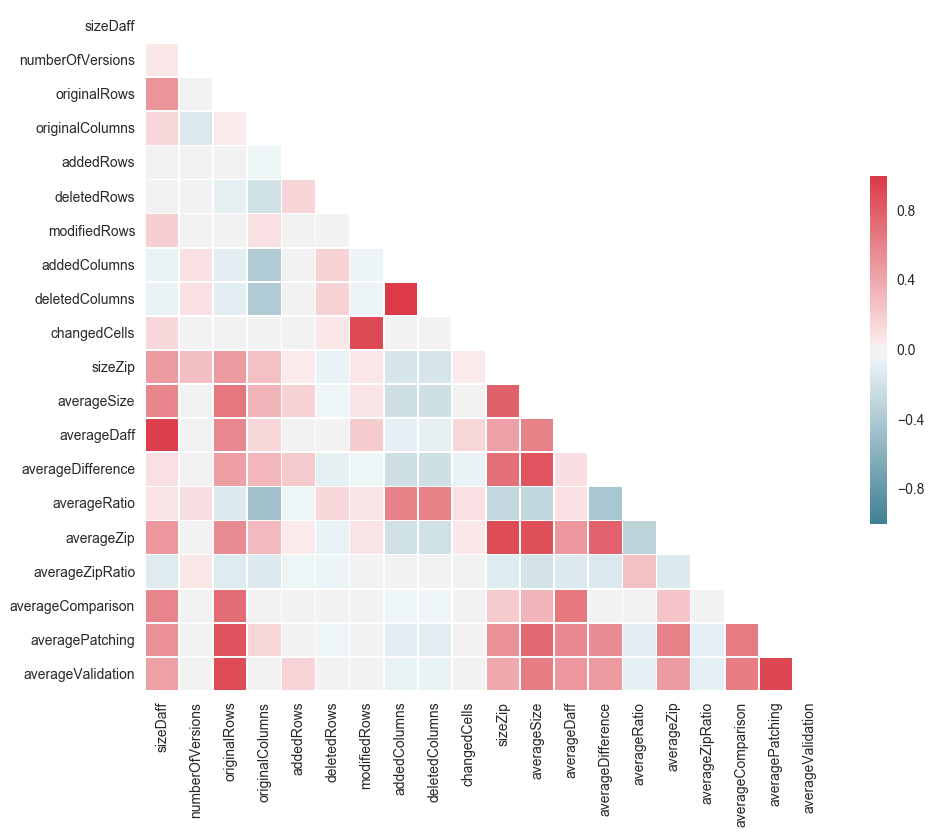

In [101]:
sns.set(style="white")
corr = dfCorr.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1,
            square=True,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax, annot_kws={"size":20})
sns.plt.savefig("pictures/correlation.pdf")
sns.plt.show()

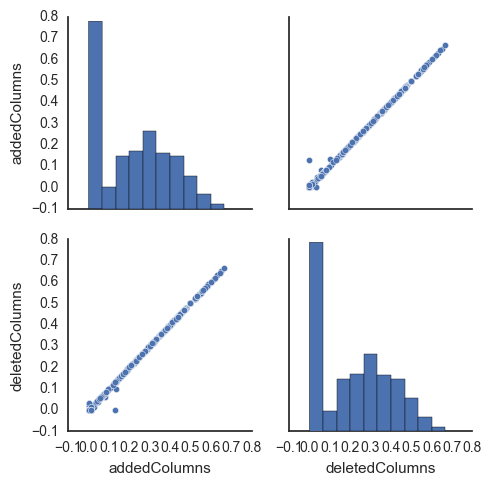

In [102]:
g = sns.pairplot(dfCorr[dfCorr['addedColumns'] < 6],vars=["addedColumns", "deletedColumns"])
sns.plt.savefig("pictures/addedDeleted.pdf")

sns.plt.show()

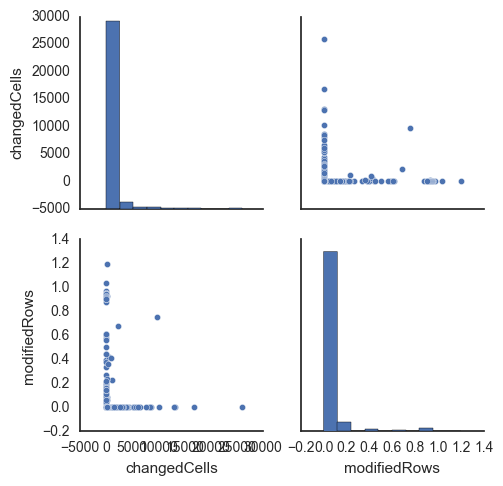

In [103]:
g = sns.pairplot(dfCorr[dfCorr['modifiedRows'] < 6],vars=["changedCells", "modifiedRows"])
sns.plt.savefig("pictures/cellsRows.pdf")

sns.plt.show()

In [104]:
dfCorr[(df['addedColumns'] == 0) & (df['deletedColumns'] ==0) & (df['addedRows'] == 0) & (df['deletedRows'] ==0)].count()

sizeDaff             10
numberOfVersions     10
originalRows         10
originalColumns      10
addedRows            10
deletedRows          10
modifiedRows         10
addedColumns         10
deletedColumns       10
changedCells         10
sizeZip              10
schema               10
averageSize          10
averageDaff          10
averageDifference    10
averageRatio         10
averageZip           10
averageZipRatio      10
averageComparison    10
averagePatching      10
averageValidation    10
dtype: int64

In [74]:
dfStatic = dfCorr[(df['addedColumns'] == 0) & (df['deletedColumns'] ==0) & (df['addedRows'] == 0) & (df['deletedRows'] ==0)]
dfStatic

,sizeDaff,numberOfVersions,originalRows,originalColumns,addedRows,deletedRows,modifiedRows,addedColumns,deletedColumns,changedCells,schema,averageSize,averageDaff,averageDifference,averageRatio,averageComparison,averagePatching,averageValidation
folder,,,,,,,,,,,,,,,,,,
5171,327327,18,214,10,0.0,0.0,0.944444,0.0,0.0,0.105607,same,28567.555556,18184.833333,10382.722222,0.636555,19.722222,29.222222,7.777778
5540,2920815,17,732,44,0.0,0.0,0.941176,0.0,0.0,0.025839,same,371167.176471,171812.647059,199354.529412,0.462898,1035.058824,5472.176471,149.352941
5680,90369,15,69,32,0.0,0.0,0.333333,0.0,0.0,0.012107,same,25389.400000,6024.600000,19364.800000,0.237288,8.333333,24.666667,5.866667
5847,443814,14,310,11,0.0,0.0,0.928571,0.0,0.0,0.090930,same,43627.714286,31701.000000,11926.714286,0.726625,44.500000,66.714286,11.214286
5933,5616,16,4,4,0.0,0.0,0.875000,0.0,0.0,0.578125,same,240.812500,351.000000,-110.187500,1.457566,0.750000,0.562500,0.437500
6273,708261,12,9,4,0.0,0.0,0.916667,0.0,0.0,0.250000,same,58814.250000,59021.750000,-207.500000,1.003528,246.000000,164.916667,189.250000
6528,6188,11,14,3,0.0,0.0,0.902597,0.0,0.0,0.461039,same,395.818182,562.545455,-166.727273,1.421222,1.818182,1.181818,0.636364
6618,81136,11,280,14,0.0,0.0,0.090260,0.0,0.0,0.012894,same,51216.454545,7376.000000,43840.454545,0.144016,16.090909,83.090909,11.454545
6798,4082,11,4,4,0.0,0.0,0.909091,0.0,0.0,0.602273,same,241.636364,371.090909,-129.454545,1.535741,0.636364,0.636364,0.636364


In [88]:
dfLabel = dfCorr.copy()

In [89]:
dfLabel.describe()

,sizeDaff,numberOfVersions,originalRows,originalColumns,addedRows,deletedRows,modifiedRows,addedColumns,deletedColumns,changedCells,averageSize,averageDaff,averageDifference,averageRatio,averageComparison,averagePatching,averageValidation
count,7.260000e+02,726.000000,726.000000,726.000000,726.000000,726.000000,726.000000,726.000000,726.000000,726.000000,726.000000,726.000000,726.000000,726.000000,726.000000,726.000000,726.000000
mean,2.922477e+05,17.826446,431.234160,5.404959,1.852942,0.792824,0.088197,0.225498,0.224304,1663.955061,39951.069432,16939.287271,23011.782161,0.744244,361.479476,530.344862,69.796603
std,9.737492e+05,6.179848,1596.233829,8.479829,21.371108,2.021257,0.802850,0.286035,0.286892,29564.600994,97569.200191,51290.988392,77595.228227,0.458238,5870.770890,3745.105092,432.485684
min,1.069000e+03,8.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000545,19.000000,41.115385,-243470.409091,0.018294,0.500000,0.384615,0.409091
25%,6.323375e+04,14.000000,24.000000,1.000000,0.028640,0.008388,0.000000,0.009259,0.000000,3.746759,4189.005013,3653.739583,-218.937500,0.329529,17.376488,3.892534,9.308333
50%,1.110580e+05,18.000000,74.000000,1.000000,0.220709,0.209025,0.000000,0.229021,0.229021,100.296340,11580.639706,6324.330357,2295.355263,0.730028,37.103679,7.302174,18.623737
75%,2.265822e+05,21.000000,455.000000,6.000000,0.771335,0.523821,0.003696,0.362727,0.362727,361.371122,23219.762363,12183.635870,10236.473077,1.058944,59.813939,21.000000,28.869444
max,1.423151e+07,92.000000,29225.000000,51.000000,572.250000,31.408696,19.774510,6.187500,6.187500,795793.332881,833930.047619,837147.470588,771582.238095,3.684918,157450.941176,59141.235294,6815.705882


In [91]:


#Same schema
dfLabel.loc[(dfLabel['addedColumns'] == 0) & (dfLabel['deletedColumns'] ==0) & ((dfLabel['addedRows'] > 0) | (dfLabel['deletedRows'] >0)), 'class'] = 'schema'

#Same rows
dfLabel.loc[((dfLabel['addedColumns'] > 0) | (dfLabel['deletedColumns'] >0)) & (dfLabel['addedRows'] == 0) & (dfLabel['deletedRows'] ==0), 'class'] = 'rows'

#Irregular
dfLabel.loc[((dfLabel['addedColumns'] > 0) | (dfLabel['deletedColumns'] >0)) & ((dfLabel['addedRows'] > 0) | (dfLabel['deletedRows'] > 0)), 'class'] = 'irregular'






In [103]:
dfLabel['cells'] = 0

In [104]:
dfLabel['cells'] = dfLabel['originalColumns'] * dfLabel['originalRows']

In [105]:
dfLabel[['class', 'cells']].to_csv('classes.csv', delimiter=";")

,sizeDaff,numberOfVersions,originalRows,originalColumns,addedRows,deletedRows,modifiedRows,addedColumns,deletedColumns,changedCells,schema,averageSize,averageDaff,averageDifference,averageRatio,averageComparison,averagePatching,averageValidation,class
folder,,,,,,,,,,,,,,,,,,,
5171,327327,18,214,10,0.0,0.0,0.944444,0.0,0.0,0.105607,same,28567.555556,18184.833333,10382.722222,0.636555,19.722222,29.222222,7.777778,static
5540,2920815,17,732,44,0.0,0.0,0.941176,0.0,0.0,0.025839,same,371167.176471,171812.647059,199354.529412,0.462898,1035.058824,5472.176471,149.352941,static
5680,90369,15,69,32,0.0,0.0,0.333333,0.0,0.0,0.012107,same,25389.400000,6024.600000,19364.800000,0.237288,8.333333,24.666667,5.866667,static
5847,443814,14,310,11,0.0,0.0,0.928571,0.0,0.0,0.090930,same,43627.714286,31701.000000,11926.714286,0.726625,44.500000,66.714286,11.214286,static
5933,5616,16,4,4,0.0,0.0,0.875000,0.0,0.0,0.578125,same,240.812500,351.000000,-110.187500,1.457566,0.750000,0.562500,0.437500,static


In [102]:
dfLabel

,sizeDaff,numberOfVersions,originalRows,originalColumns,addedRows,deletedRows,modifiedRows,addedColumns,deletedColumns,changedCells,schema,averageSize,averageDaff,averageDifference,averageRatio,averageComparison,averagePatching,averageValidation,class
folder,,,,,,,,,,,,,,,,,,,
31,126897,92,1320,2,0.005097,0.000008,0.000634,0.000000,0.000000,0.005422,same,75398.836957,1379.315217,74019.521739,0.018294,42.347826,112.913043,41.739130,schema
74,165803,66,18,12,0.005892,0.001684,1.194444,0.002525,0.002525,114.413931,different,2527.515152,2512.166667,15.348485,0.993927,2.303030,1.651515,1.606061,irregular
98,921000,56,1858,18,0.000951,0.000048,0.023643,0.001984,0.000000,7.818300,different,260879.821429,16446.428571,244433.392857,0.063042,365.553571,4238.071429,184.410714,irregular
516,589086,42,157,22,0.009099,0.001365,0.000000,0.000000,0.000000,0.010299,same,131531.761905,14025.857143,117505.904762,0.106635,48.166667,241.357143,34.571429,schema
519,286304,44,64,13,0.154830,0.008168,0.067827,0.000000,0.000000,0.169744,same,73545.022727,6506.909091,67038.113636,0.088475,29.363636,156.977273,18.431818,schema
595,147344,44,40,13,0.121023,0.002273,0.068750,0.010490,0.000000,50.615516,different,30777.204545,3348.727273,27428.477273,0.108805,11.068182,37.272727,7.272727,irregular
600,192822,51,27,15,0.011619,0.013072,0.915033,0.000000,0.000000,0.096538,same,3286.803922,3780.823529,-494.019608,1.150304,2.529412,1.941176,1.176471,schema
650,251436,42,452,18,0.007217,0.000000,0.035556,0.002646,0.000000,3.843927,different,65586.285714,5986.571429,59599.714286,0.091278,49.642857,280.500000,26.000000,irregular
760,40246,43,7,13,0.205980,0.003322,0.106312,0.000000,0.000000,0.218502,same,9283.395349,935.953488,8347.441860,0.100820,3.255814,4.674419,2.465116,schema


In [75]:
dfStatic.to_csv('static.csv', sep=';')

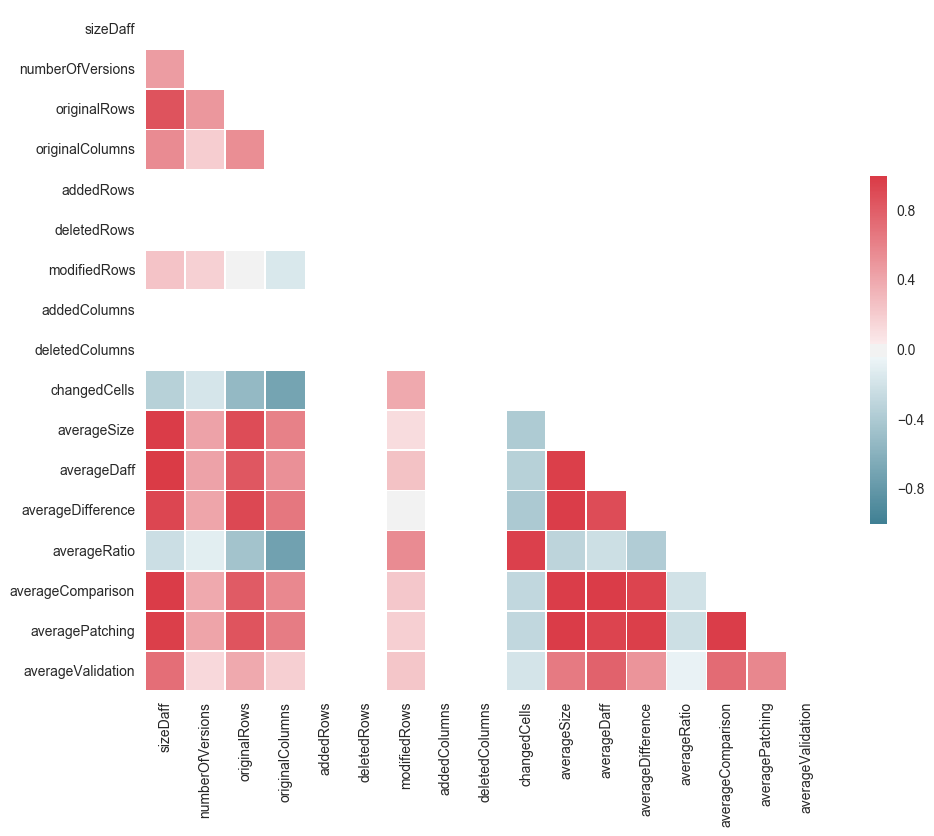

In [59]:
#STATIC
sns.set(style="white")
corr = dfCorr[(df['addedColumns'] == 0) & (df['deletedColumns'] ==0) & (df['addedRows'] == 0) & (df['deletedRows'] ==0)].corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1,
            square=True,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)
sns.plt.show()

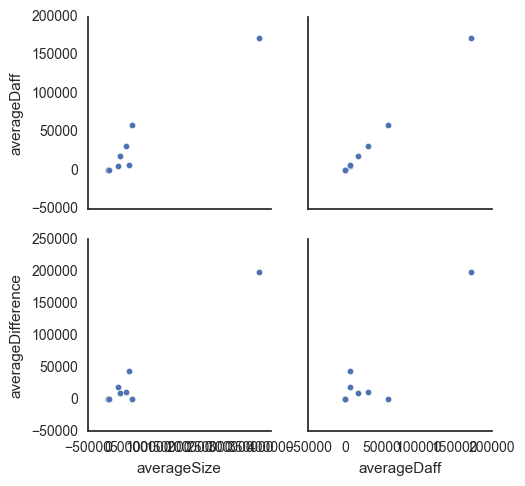

In [60]:
g = sns.pairplot(dfCorr[(df['addedColumns'] == 0) & (df['deletedColumns'] ==0) & (df['addedRows'] == 0) & (df['deletedRows'] ==0)],x_vars=["averageSize", "averageDaff"],y_vars=["averageDaff", "averageDifference"] )
sns.plt.show()

In [61]:
dfCorr[ (df['deletedColumns'] ==0) & ((df['addedRows'] > 0) | (df['addedColumns'] > 0))  & (df['deletedRows'] ==0)].count()

sizeDaff             71
numberOfVersions     71
originalRows         71
originalColumns      71
addedRows            71
deletedRows          71
modifiedRows         71
addedColumns         71
deletedColumns       71
changedCells         71
schema               71
averageSize          71
averageDaff          71
averageDifference    71
averageRatio         71
averageComparison    71
averagePatching      71
averageValidation    71
dtype: int64

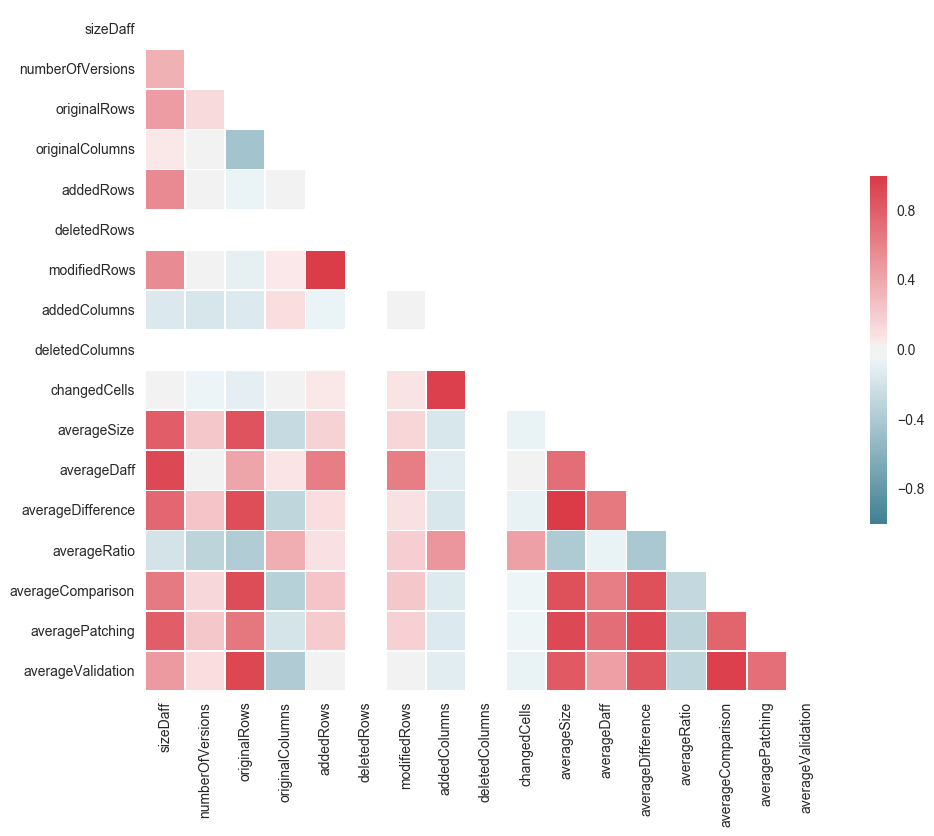

In [62]:
#INCREASING
sns.set(style="white")
corr = dfCorr[ (df['deletedColumns'] ==0) & ((df['addedRows'] > 0) | (df['addedColumns'] > 0))  & (df['deletedRows'] ==0)].corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1,
            square=True,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)
sns.plt.show()

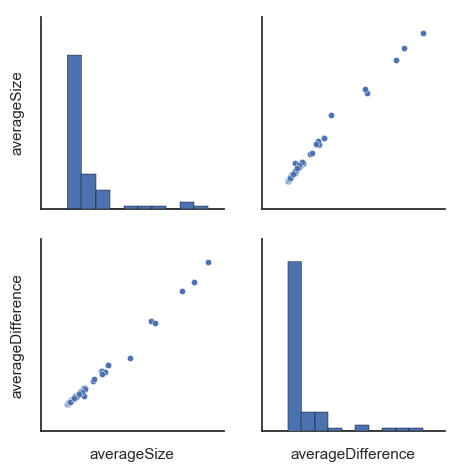

In [63]:
g = sns.pairplot(dfCorr[ (df['deletedColumns'] ==0) & ((df['addedRows'] > 0) | (df['addedColumns'] > 0))  & (df['deletedRows'] ==0)] ,vars=["averageSize", "averageDifference"] )
g.set(xticklabels=[])
g.set(yticklabels=[])
sns.plt.savefig("pictures/increasing1.pdf")
sns.plt.show()

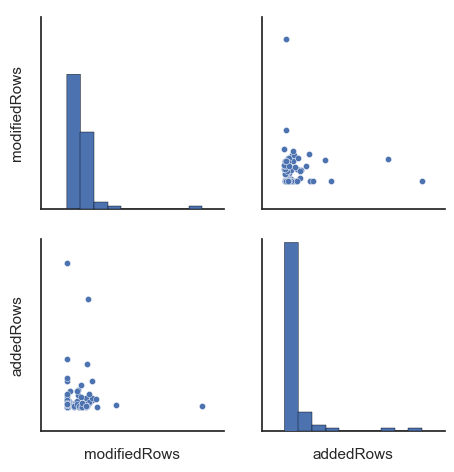

In [61]:
g = sns.pairplot(dfCorr[ (df['deletedColumns'] ==0) & ((df['addedRows'] > 0) | (df['addedColumns'] > 0))  & (df['deletedRows'] ==0) & (df['addedRows'] < 6)] ,vars=["modifiedRows", "addedRows"] )
g.set(xticklabels=[])
g.set(yticklabels=[])
sns.plt.savefig("pictures/increasing2.pdf")
sns.plt.show()

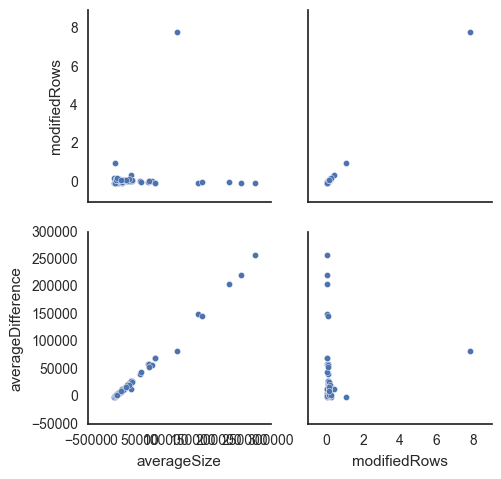

In [65]:
g = sns.pairplot(dfCorr[ (df['deletedColumns'] ==0) & ((df['addedRows'] > 0) | (df['addedColumns'] > 0))  & (df['deletedRows'] ==0)] ,x_vars=["averageSize", "modifiedRows"],y_vars=["modifiedRows", "averageDifference"] )
sns.plt.show()

In [66]:
dfCorr[ (df['addedRows'] ==0) & ((df['deletedColumns'] > 0) | (df['deletedRows'] > 0))  & (df['addedColumns'] ==0)]

,sizeDaff,numberOfVersions,originalRows,originalColumns,addedRows,deletedRows,modifiedRows,addedColumns,deletedColumns,changedCells,schema,averageSize,averageDaff,averageDifference,averageRatio,averageComparison,averagePatching,averageValidation
folder,,,,,,,,,,,,,,,,,,
6214,188147,11,133,32,0.0,0.002734,0.611757,0.0,0.0,0.021852,same,49627.181818,17104.272727,32522.909091,0.344655,41.454545,144.000000,26.000000
6410,899950,12,3441,14,0.0,0.000024,0.083285,0.0,0.0,0.012903,same,402426.916667,74995.833333,327431.083333,0.186359,1588.916667,10459.583333,482.166667


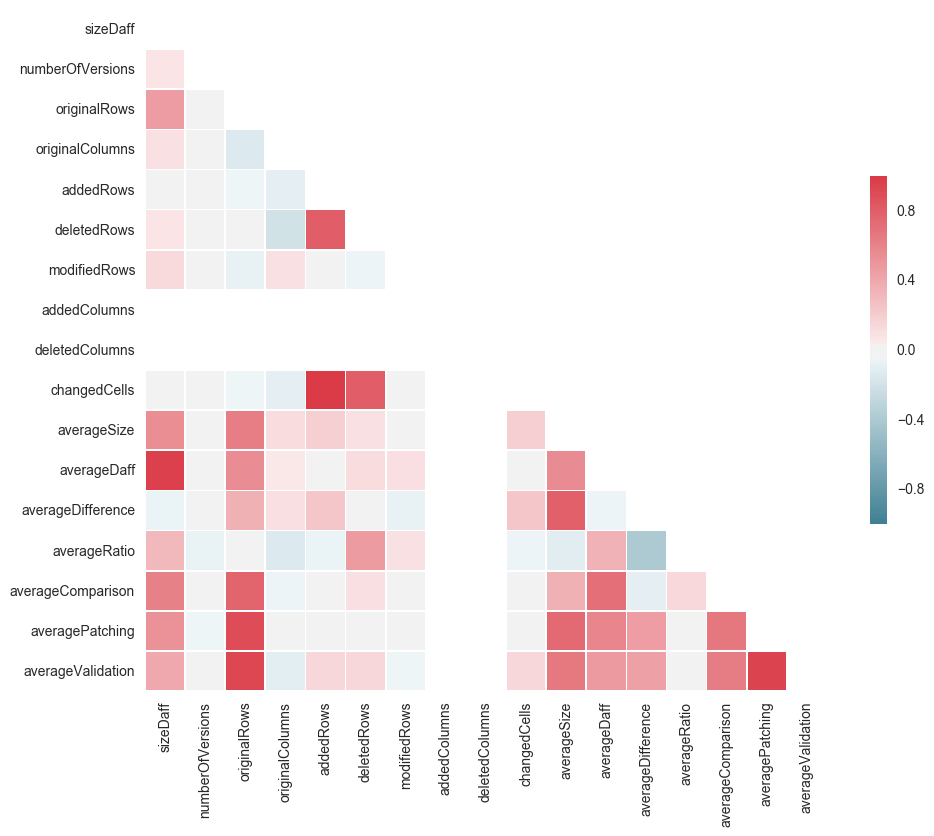

In [67]:
#SAME SCHEMA
sns.set(style="white")
corr = dfCorr[(df['addedColumns'] == 0) & (df['deletedColumns'] ==0) & ((df['addedRows'] > 0) | (df['deletedRows'] >0))].corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1,
            square=True,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)
sns.plt.show()

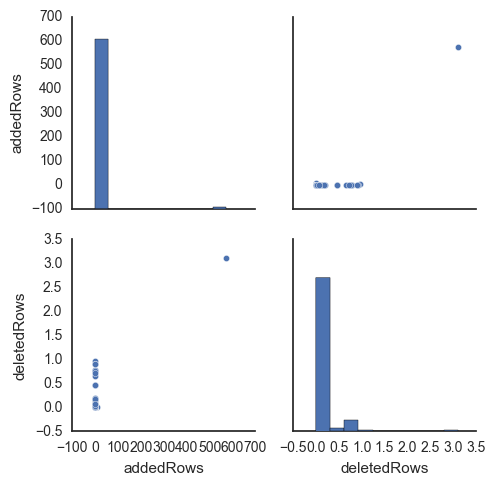

In [68]:
g = sns.pairplot(dfCorr[(df['addedColumns'] == 0) & (df['deletedColumns'] ==0) & ((df['addedRows'] > 0) | (df['deletedRows'] >0))] ,vars=["addedRows", "deletedRows"] )
sns.plt.savefig("pictures/sameschema1.pdf")
sns.plt.show()

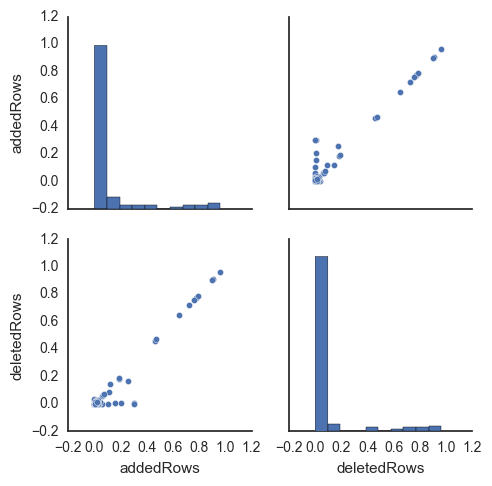

In [69]:
g = sns.pairplot(dfCorr[(df['addedRows'] < 8) & (df['addedColumns'] == 0) & (df['deletedColumns'] ==0) & ((df['addedRows'] > 0) | (df['deletedRows'] >0))] ,vars=["addedRows", "deletedRows"] )
sns.plt.savefig("pictures/sameschema2.pdf")
sns.plt.show()

In [70]:
dfCorr[(df['addedColumns'] == 0) & (df['deletedColumns'] ==0) & ((df['addedRows'] > 0) | (df['deletedRows'] >0))].count()

sizeDaff             107
numberOfVersions     107
originalRows         107
originalColumns      107
addedRows            107
deletedRows          107
modifiedRows         107
addedColumns         107
deletedColumns       107
changedCells         107
schema               107
averageSize          107
averageDaff          107
averageDifference    107
averageRatio         107
averageComparison    107
averagePatching      107
averageValidation    107
dtype: int64

In [71]:
dfCorr[((df['addedColumns'] > 0) | (df['deletedColumns'] >0)) & (df['addedRows'] == 0) & (df['deletedRows'] ==0)].count()

sizeDaff             9
numberOfVersions     9
originalRows         9
originalColumns      9
addedRows            9
deletedRows          9
modifiedRows         9
addedColumns         9
deletedColumns       9
changedCells         9
schema               9
averageSize          9
averageDaff          9
averageDifference    9
averageRatio         9
averageComparison    9
averagePatching      9
averageValidation    9
dtype: int64

In [72]:
dfCorr2 = dfCorr.copy()

In [73]:
del dfCorr2['addedRows']
del dfCorr2['deletedRows']

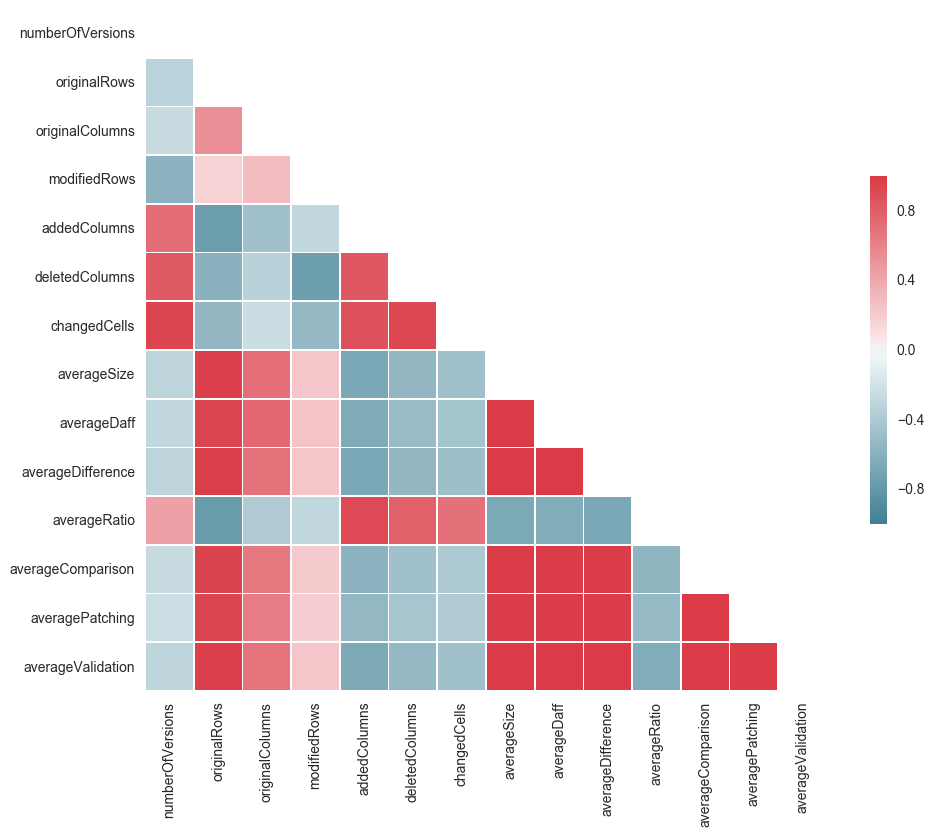

In [198]:
#SAME ROWS
sns.set(style="white")
corr = dfCorr2[((df['addedColumns'] > 0) | (df['deletedColumns'] >0)) & (df['addedRows'] == 0) & (df['deletedRows'] ==0)].corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1,
            square=True,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)
sns.plt.savefig("pictures/samerows.pdf")
sns.plt.show()

In [146]:
dfCorr[((df['addedColumns'] > 0) | (df['deletedColumns'] >0)) & ((df['addedRows'] > 0) | (df['deletedRows'] > 0))].count()

numberOfVersions     600
originalRows         600
originalColumns      600
addedRows            600
deletedRows          600
modifiedRows         600
addedColumns         600
deletedColumns       600
changedCells         600
schema               600
averageSize          600
averageDaff          600
averageDifference    600
averageRatio         600
averageComparison    600
averagePatching      600
averageValidation    600
dtype: int64

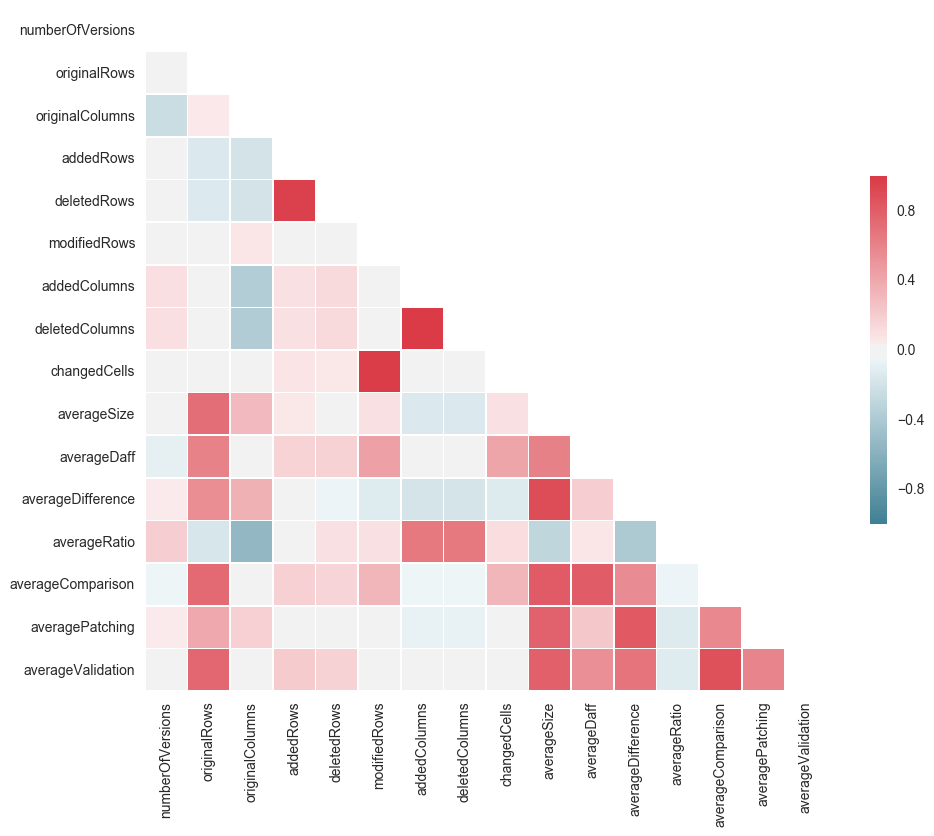

In [199]:
#IRREGULAR
sns.set(style="white")
corr = dfCorr[((df['addedColumns'] > 0) | (df['deletedColumns'] >0)) & ((df['addedRows'] > 0) | (df['deletedRows'] > 0))].corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1,
            square=True,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)
sns.plt.savefig("pictures/samerows.pdf")
sns.plt.show()

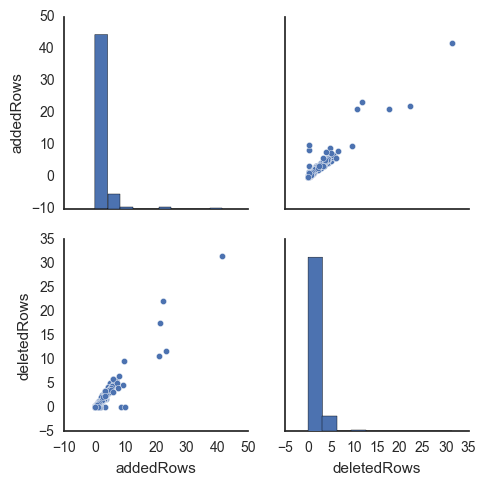

In [203]:
g = sns.pairplot(dfCorr[((df['addedColumns'] > 0) | (df['deletedColumns'] >0)) & ((df['addedRows'] > 0) | (df['deletedRows'] > 0))] ,vars=["addedRows", "deletedRows"] )
sns.plt.savefig("pictures/irregular1.pdf")
sns.plt.show()

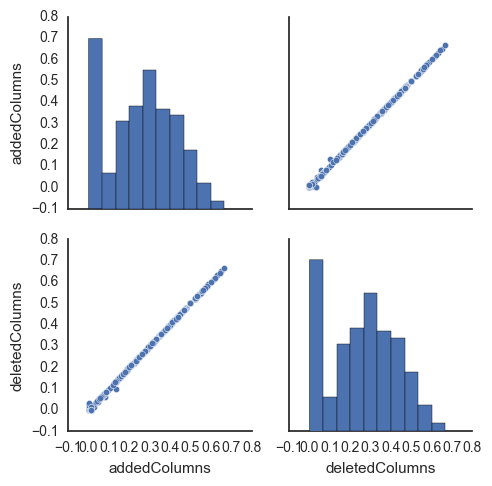

In [106]:
g = sns.pairplot(dfCorr[((df['addedColumns'] > 0) | (df['deletedColumns'] >0)) & ((df['addedRows'] > 0) | (df['deletedRows'] > 0)) & (df['deletedColumns'] < 4)] ,vars=["addedColumns", "deletedColumns"] )
sns.plt.savefig("pictures/irregular2.pdf")
sns.plt.show()

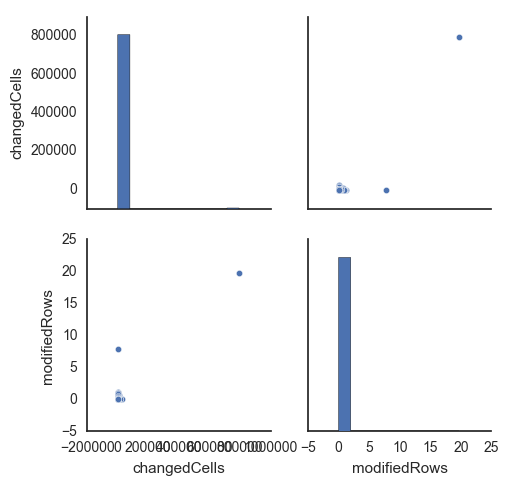

In [116]:
g = sns.pairplot(dfCorr,vars=["changedCells", "modifiedRows"])
sns.plt.show()

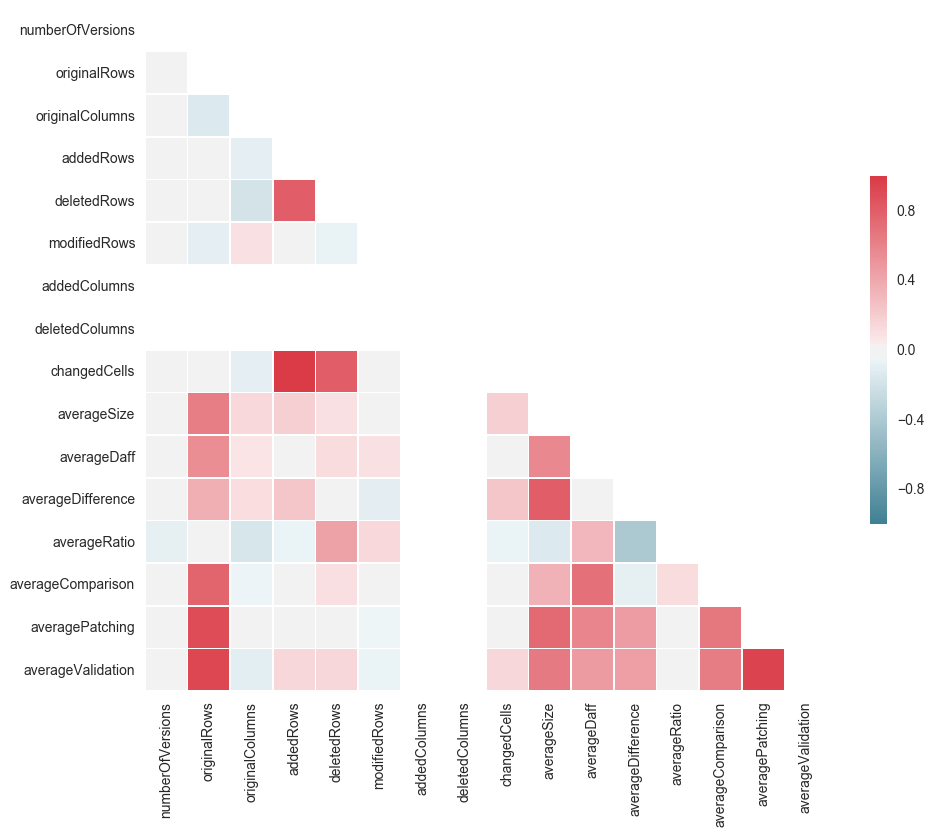

In [101]:
#SAME SCHEMA

sns.set(style="white")
corr = dfCorr[(df['addedColumns'] == 0) & (df['deletedColumns'] ==0)].corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1,
            square=True,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)
sns.plt.show()

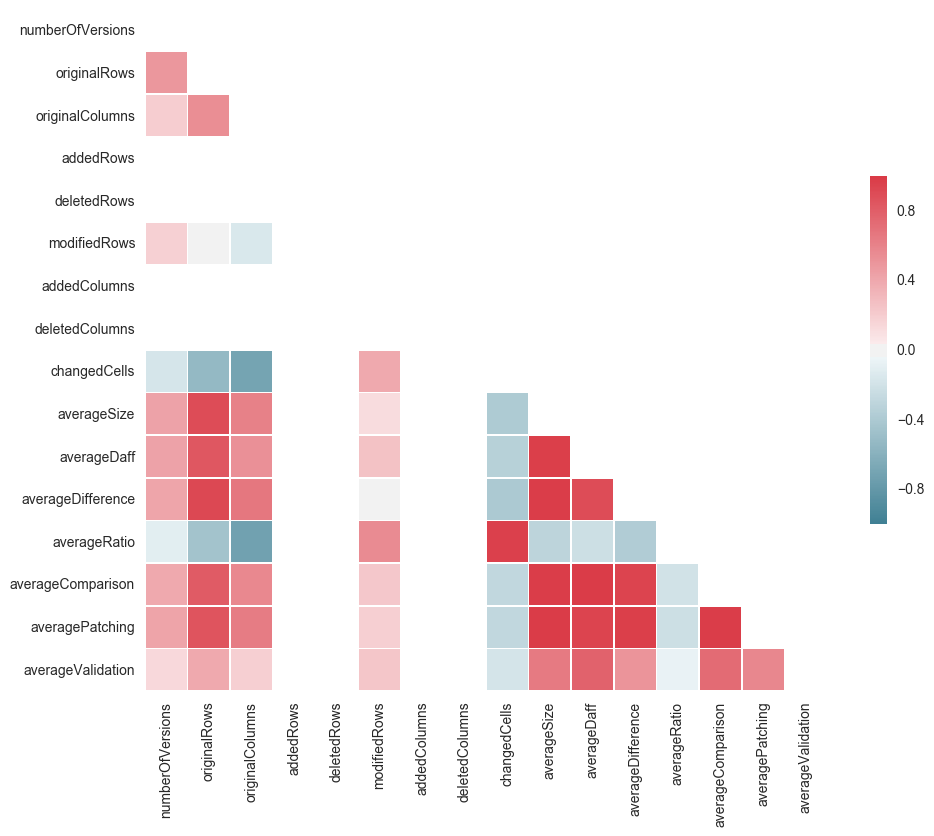

In [102]:
#STATIC

sns.set(style="white")
corr = dfCorr[(df['addedColumns'] == 0) & (df['deletedColumns'] ==0) & (df['addedRows'] == 0) & (df['deletedRows'] ==0)].corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1,
            square=True,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)
sns.plt.show()

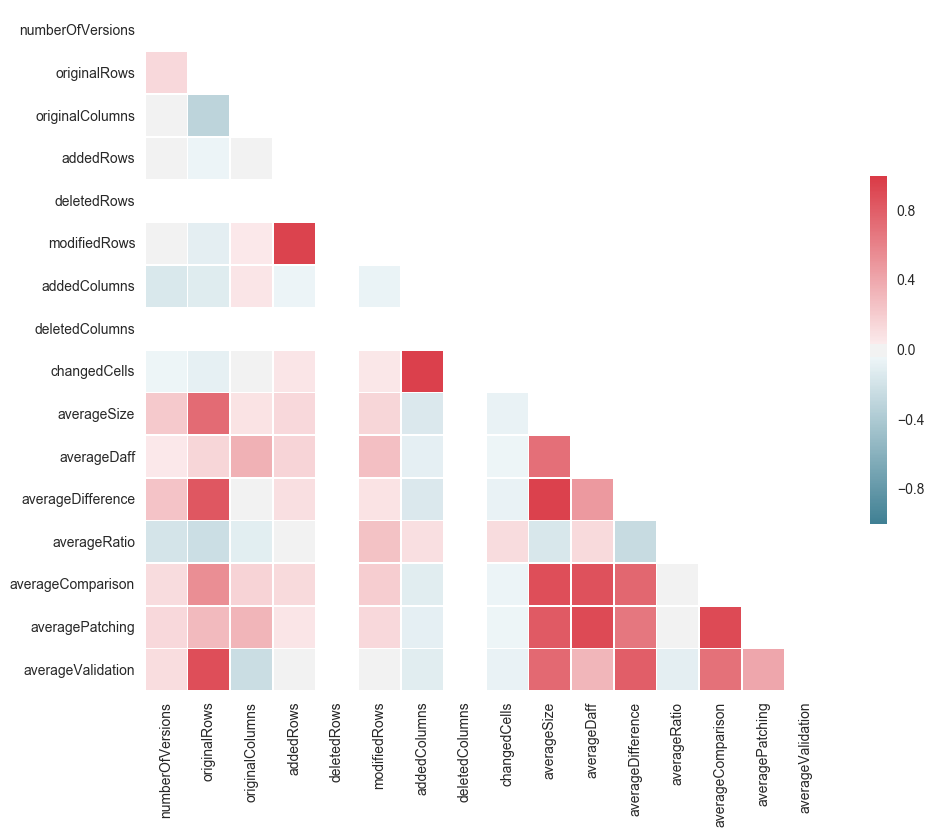

In [111]:
##GROWING

sns.set(style="white")
corr = dfCorr[(df['addedColumns'] >= 0) & (df['deletedColumns'] ==0) & (df['addedRows'] >= 0) & (df['deletedRows'] ==0)].corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1,
            square=True,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)
sns.plt.show()

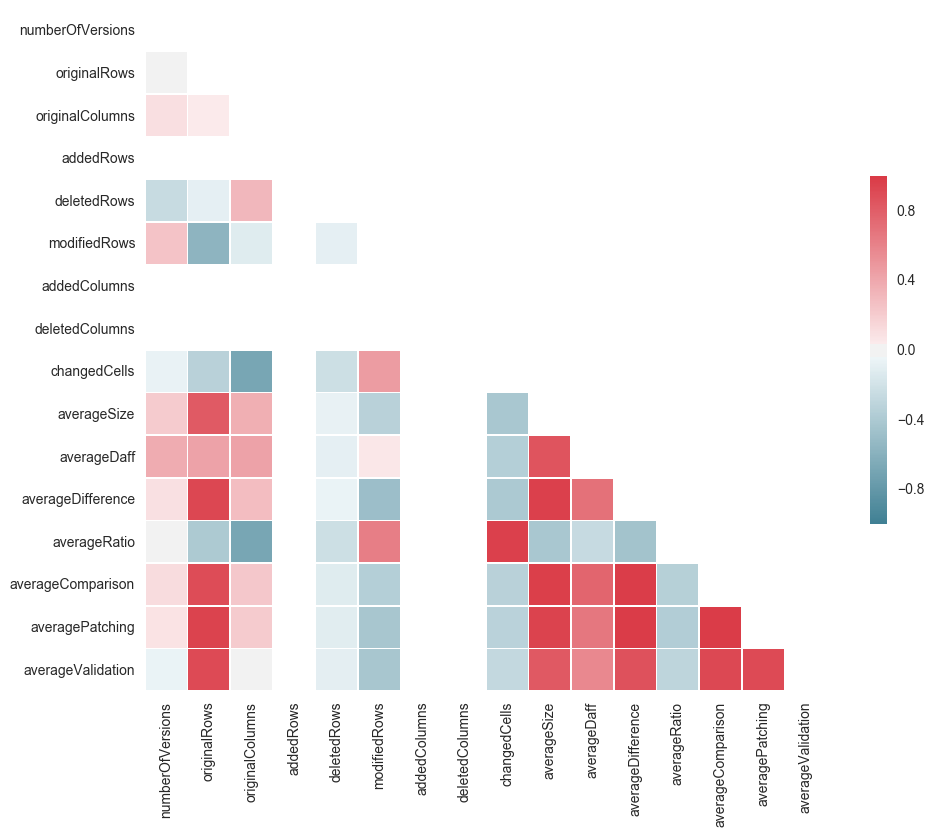

In [112]:
##SHRINKING

sns.set(style="white")
corr = dfCorr[(df['addedColumns'] == 0) & (df['deletedColumns'] >= 0) & (df['addedRows'] == 0) & (df['deletedRows']  >= 0)].corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1,
            square=True,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)
sns.plt.show()